<a href="https://colab.research.google.com/github/qb4745/evaluacion_1_deep_learning/blob/main/evaluacion_1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===============================
# MLP para Fashion MNIST
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Parámetros globales
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote para entrenamiento
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de carga de datos...
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: ...y los preprocesa para su uso en redes neuronales.
# Normalización: Escalar imágenes al rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Reformateo: Añadir dimensión de canal (necesario para Keras aunque sea 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# IL 1.2: (Relacionado) Preparación de etiquetas para función de error/salida 'categorical_crossentropy'/'softmax'
# One-hot encoding de etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1: ...considerando los conceptos de Deep Learning, tales como Perceptrón, Perceptrón multicapa y Red Neuronal Artificial.
# IL 1.3: Programa algoritmos en lenguaje Python, utilizando Tensorflow mediante Keras... para optimizar un modelo... (MLP).
print("\nDefiniendo la arquitectura del modelo MLP...")
model = keras.Sequential(name="mlp_fashion_mnist")
# Capa de aplanamiento para convertir la imagen 2D en vector 1D para el MLP
model.add(layers.Flatten(input_shape=input_shape))

# IL 1.2: Programa funciones de activación... aplicada a redes neuronales...
# Capa oculta 1 con activación ReLU
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))

# IL 1.3: ...aplicando técnicas de optimización y regularización, como dropout...
# Capa Dropout para regularización
model.add(layers.Dropout(0.5, name="dropout_1"))

# Capa oculta 2 con activación ReLU
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(0.5, name="dropout_2")) # Más Dropout

# IL 1.2: Programa funciones de... salida... aplicada a redes neuronales...
# Capa de salida con activación Softmax para clasificación multiclase
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

# Mostrar resumen de la arquitectura creada
model.summary()

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: ...para optimizar un modelo... (Selección de optimizador y tasa de aprendizaje)
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Programa funciones de... error... aplicada a redes neuronales...
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy... (Se especifica aquí)
model.compile(
    loss="categorical_crossentropy", # Función de error/pérdida
    optimizer=optimizer,             # Algoritmo de optimización
    metrics=["accuracy"]             # Métrica(s) a monitorizar
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de... entrenamiento de la red neuronal...
# Configura parámetros clave como épocas y tamaño de batch (definidos en Sección 1).
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa parte del training set para validación durante el entrenamiento
    verbose=2 # Muestra una línea por época
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy...
print("\nEvaluando en conjunto de prueba:")
score = model.evaluate(x_test, y_test, verbose=0) # Evalúa en datos no vistos
print(f"Test loss: {score[0]:.4f}")
# Esta es la métrica 'accuracy' calculada en el conjunto de prueba
print(f"Test accuracy: {score[1]:.4f}")

# ===============================
# Fin del Script Principal
# ===============================

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "mlp_fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 9s - 22ms/step - accuracy: 0.6628 - loss: 0.9458 - val_accuracy: 0.8043 - val_loss: 0.5138
Epoch 2/15
422/422 - 3s - 7ms/step - accuracy: 0.7817 - loss: 0.6202 - val_accuracy: 0.8400 - val_loss: 0.4483
Epoch 3/15
422/422 - 4s - 10ms/step - accuracy: 0.8094 - loss: 0.5515 - val_accuracy: 0.8463 - val_loss: 0.4180
Epoch 4/15
422/422 - 3s - 6ms/step - accuracy: 0.8213 - loss: 0.5162 - val_accuracy: 0.8552 - val_loss: 0.3957
Epoch 5/15
422/422 - 2s - 5ms/step - accuracy: 0.8294 - loss: 0.4963 - val_accuracy: 0.8523 - val_loss: 0.3896
Epoch 6/15
422/422 - 3s - 6ms/step - accuracy: 0.8336 - loss: 0.4764 - val_accuracy: 0.8608 - val_loss: 0.3724
Epoch 7/15
422/422 - 3s - 7ms/step - accuracy: 0.8398 - loss: 0.4639 - val_accuracy: 0.8630 - val_loss: 0.3719
Epoch 8/15
422/422 - 4s - 10ms/step - accuracy: 0.8425 - loss: 0.4513 - val_accuracy: 0.8630 - val_loss

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP (Baseline)...


Model: "mlp_fashion_mnist_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 4s - 9ms/step - accuracy: 0.6629 - loss: 0.9394 - val_accuracy: 0.8225 - val_loss: 0.4920
Epoch 2/15
422/422 - 2s - 5ms/step - accuracy: 0.7903 - loss: 0.6040 - val_accuracy: 0.8392 - val_loss: 0.4438
Epoch 3/15
422/422 - 2s - 5ms/step - accuracy: 0.8102 - loss: 0.5433 - val_accuracy: 0.8497 - val_loss: 0.4115
Epoch 4/15
422/422 - 4s - 9ms/step - accuracy: 0.8246 - loss: 0.5060 - val_accuracy: 0.8523 - val_loss: 0.3929
Epoch 5/15
422/422 - 2s - 6ms/step - accuracy: 0.8298 - loss: 0.4896 - val_accuracy: 0.8580 - val_loss: 0.3991
Epoch 6/15
422/422 - 2s - 5ms/step - accuracy: 0.8351 - loss: 0.4718 - val_accuracy: 0.8672 - val_loss: 0.3740
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.8402 - loss: 0.4596 - val_accuracy: 0.8628 - val_loss: 0.3701
Epoch 8/15
422/422 - 2s - 5ms/step - accuracy: 0.8440 - loss: 0.4431 - val_accuracy: 0.8650 - val_loss: 0

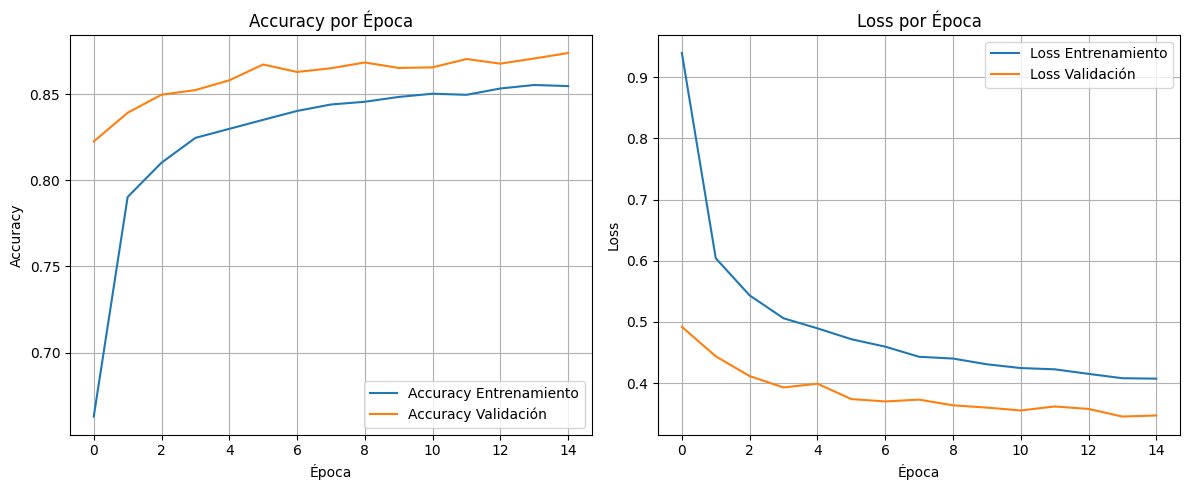


--- Fin del Script ---


In [2]:
# ===============================
# MLP para Fashion MNIST - Versión Mejorada para Cumplir ILs
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt # Añadido para visualización
from sklearn.metrics import classification_report # Añadido para métricas IL 1.4

# Parámetros globales (Estos son HIPERPARÁMETROS CLAVE para experimentar - IL 1.1, IL 1.3)
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam
dropout_rate = 0.5       # Tasa de Dropout (¡experimentar con este valor!)

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Carga de datos
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: Preprocesamiento
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# Guardar copias de las etiquetas de prueba para evaluación posterior (IL 1.4)
y_test_labels = y_test.copy() # Guardar etiquetas originales (números 0-9)

# IL 1.2: Preparación de etiquetas para 'categorical_crossentropy'/'softmax'
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1, IL 1.3: Implementación de un MLP usando Keras
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.2):**
#    - Para probar otras funciones de activación, cambia 'relu' por 'sigmoid', 'tanh', etc.
#    - Para probar diferentes arquitecturas, cambia el número de capas o neuronas (ej: 128 -> 256).
#    - Entrena un modelo por cada cambio y compara resultados.
print("\nDefiniendo la arquitectura del modelo MLP (Baseline)...")
model = keras.Sequential(name="mlp_fashion_mnist_baseline")
model.add(layers.Flatten(input_shape=input_shape))
# IL 1.2: Uso de función de activación 'relu'
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))
# IL 1.3: Uso de técnica de regularización 'Dropout'
model.add(layers.Dropout(dropout_rate, name="dropout_1")) # ¡Experimenta con dropout_rate!
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(dropout_rate, name="dropout_2"))
# IL 1.2: Uso de función de activación/salida 'softmax'
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

model.summary() # Útil para verificar la estructura y número de parámetros

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: Selección de optimizador Adam
# **ACCIÓN REQUERIDA (Experimentación IL 1.3):**
#    - Prueba otros optimizadores (ej: keras.optimizers.SGD(learning_rate=...)).
#    - Ajusta el 'learning_rate'.
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Selección de función de error 'categorical_crossentropy'
# **ACCIÓN REQUERIDA (Experimentación IL 1.2):**
#    - Si usas etiquetas numéricas (no one-hot), podrías usar 'sparse_categorical_crossentropy'.
#    - Compara el impacto si cambias la función de error (aunque categorical_crossentropy es estándar aquí).
# IL 1.4: Especificación de métrica 'accuracy' (se añadirán otras en evaluación)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"] # Accuracy se calcula durante el entrenamiento/evaluación
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecución del entrenamiento
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.3):**
#    - Ejecuta este bloque con diferentes 'batch_size' y 'epochs'.
#    - Compara las curvas de aprendizaje (generadas más abajo) para cada experimento.
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa 10% para validación
    verbose=2
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación Detallada en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa desempeño con accuracy, precision, recall, F1-Score
print("\nEvaluando en conjunto de prueba:")
# Paso 1: Obtener Loss y Accuracy base con evaluate()
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss (Pérdida): {score[0]:.4f}")
print(f"Test accuracy (Exactitud): {score[1]:.4f}")

# Paso 2: Obtener predicciones para calcular otras métricas
y_pred_prob = model.predict(x_test) # Obtiene probabilidades de salida
y_pred_classes = np.argmax(y_pred_prob, axis=1) # Convierte probabilidades a clase predicha (0-9)

# Paso 3: Calcular Precision, Recall, F1-Score usando classification_report
# Necesitamos las etiquetas de prueba originales (0-9), no las one-hot
print("\nReporte de Clasificación (Precision, Recall, F1-Score por clase y promedios):")
# y_test_labels fue guardada antes del one-hot encoding
print(classification_report(y_test_labels, y_pred_classes, digits=4))

# **ACCIÓN REQUERIDA (IL 1.4):**
#    - Crear un cuadro resumen en tu informe/notebook con Accuracy, Precision (promedio), Recall (promedio), F1-Score (promedio).
#    - Interpretar estas métricas: ¿Qué clases clasifica bien/mal? ¿Hay desbalance?
#    - Comparar estas métricas entre los diferentes modelos que entrenaste en tus experimentos.

# -------------------------------
# Sección 7: Visualización de Curvas de Aprendizaje (Análisis IL 1.1, IL 1.3)
# -------------------------------
# Útil para analizar el entrenamiento, detectar overfitting/underfitting y comparar experimentos
print("\nGenerando gráficos de curvas de aprendizaje...")
plt.figure(figsize=(12, 5))

# Gráfico de Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Accuracy por Época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfico de Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validación')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() # Muestra los gráficos

# **ACCIÓN REQUERIDA (Análisis y Comparación IL 1.1, IL 1.3):**
#    - Analiza estas curvas: ¿Hay sobreajuste (gap grande entre train/val)? ¿El modelo converge?
#    - Guarda estos gráficos para cada experimento que realices (ej., con diferente tasa de dropout, diferente # de épocas, etc.).
#    - Presenta gráficos comparativos en tu informe/notebook para justificar cómo las técnicas de optimización (dropout) o los cambios de hiperparámetros afectaron el entrenamiento.

# ===============================
# Sección 8: Conclusiones y Próximos Pasos (Documentación)
# ===============================
# **ACCIÓN REQUERIDA:**
#    - En tu cuaderno Jupyter, añade una sección final de Markdown para:
#        - Resumir los resultados del MEJOR modelo encontrado tras la experimentación.
#        - Discutir los hallazgos clave (qué funcionó, qué no, impacto de parámetros).
#        - Comparar explícitamente diferentes configuraciones (tabla resumen es ideal).
#        - Justificar las decisiones finales de arquitectura e hiperparámetros.
#        - Reflexionar sobre posibles mejoras futuras.
#
# ¡Recuerda documentar CADA experimento que realices en tu cuaderno!
# ===============================

print("\n--- Fin del Script ---")

---

## 1. Introducción

Este proyecto aborda un problema práctico de clasificación de imágenes utilizando una Red Neuronal Artificial (RNA) de tipo Perceptrón Multicapa (MLP). El objetivo es aplicar los fundamentos de Deep Learning para entrenar un modelo capaz de identificar diferentes tipos de artículos de moda a partir de imágenes en escala de grises.

Para este propósito, utilizaremos el dataset **Fashion-MNIST**. Este conjunto de datos fue desarrollado por Zalando Research y se presenta como un reemplazo directo ("drop-in replacement") del clásico dataset MNIST de dígitos escritos a mano. Mientras que MNIST es un estándar ampliamente utilizado para la validación inicial de algoritmos de Machine Learning, Fashion-MNIST ofrece un desafío potencialmente mayor manteniendo la misma estructura y formato: un conjunto de entrenamiento de 60,000 imágenes y un conjunto de prueba de 10,000 imágenes, todas ellas en escala de grises y de tamaño 28x28 píxeles, distribuidas en 10 clases distintas.

La elección de Fashion-MNIST nos permite trabajar con un dataset estandarizado, bien conocido en la comunidad, pero que requiere que el modelo aprenda características más complejas que las presentes en los dígitos manuscritos. El objetivo final de este encargo es implementar, entrenar, optimizar y evaluar un MLP utilizando TensorFlow/Keras para clasificar correctamente las imágenes de artículos de moda de este dataset, cumpliendo con los indicadores de logro especificados en la evaluación.

*Fuente oficial del dataset: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)*

## 2. Descripción del Dataset (Contenido)

El dataset Fashion-MNIST se compone de imágenes y sus correspondientes etiquetas de clase. A continuación, se detallan sus características principales:

*   **Dimensiones de la Imagen:** Cada imagen tiene una altura de 28 píxeles y un ancho de 28 píxeles, resultando en un total de 784 píxeles por imagen.
*   **Formato de Píxeles:** Las imágenes están en escala de grises. Cada píxel tiene asociado un único valor numérico entero que indica su nivel de oscuridad. Este valor varía entre 0 (blanco) y 255 (negro). Valores más altos representan píxeles más oscuros.
*   **Estructura de los Datos:** Cada Fila del Dataset representa una imagen:
    *   **Primera Columna:** Corresponde a la etiqueta de clase (un número del 0 al 9) que identifica el tipo de artículo de moda representado en la imagen.
    *   **Columnas Restantes (784):** Contienen los valores de los píxeles (0-255) de la imagen asociada, generalmente desplegados en un formato aplanado (vector de 784 elementos).
*   **Etiquetas de Clase:** Cada ejemplo (imagen) está asignado a una de las siguientes 10 clases, representadas por un número entero:

    *   `0`: T-shirt/top (Camiseta/Top)
    *   `1`: Trouser (Pantalón)
    *   `2`: Pullover (Suéter)
    *   `3`: Dress (Vestido)
    *   `4`: Coat (Abrigo)
    *   `5`: Sandal (Sandalia)
    *   `6`: Shirt (Camisa)
    *   `7`: Sneaker (Zapatilla deportiva)
    *   `8`: Bag (Bolso)
    *   `9`: Ankle boot (Botín)

**En resumen:** Cada fila del dataset representa una imagen de 28x28 píxeles en escala de grises, junto con una etiqueta numérica que indica a cuál de las 10 categorías de ropa pertenece. El objetivo del modelo será aprender a predecir esta etiqueta basándose en los 784 valores de píxeles de entrada.

---



---

## 3. Configuración del Entorno y Selección del Framework

Antes de proceder con la carga y preprocesamiento de los datos, es fundamental definir el entorno de trabajo y las herramientas principales que se utilizarán para la implementación de la Red Neuronal Artificial (MLP).

### 3.1. Elección del Framework: TensorFlow con Keras

Para el desarrollo de este proyecto, hemos seleccionado **TensorFlow (versión X.Y.Z)** como la biblioteca principal de Deep Learning, utilizando específicamente su interfaz de alto nivel **Keras**.

**Justificación de la Decisión:**

La elección de TensorFlow con Keras se basa en las siguientes consideraciones clave, alineadas con los objetivos de la evaluación y los requisitos del proyecto:

1.  **Facilidad de Uso y Desarrollo Rápido (API de Keras):** Keras proporciona una API intuitiva y modular que simplifica significativamente el proceso de definición, entrenamiento y evaluación de redes neuronales, incluyendo los MLP requeridos. Esto nos permite centrarnos en la aplicación de los conceptos fundamentales de Deep Learning (como la arquitectura del modelo, funciones de activación, optimizadores y métricas) en lugar de en detalles de implementación de bajo nivel.
2.  **Cumplimiento de Requisitos:** TensorFlow/Keras ofrece todas las componentes necesarias para abordar los Indicadores de Logro de esta evaluación:
    *   Capas densas para construir el MLP.
    *   Amplia variedad de funciones de activación  y la flexibilidad para definir funciones personalizadas si fuera necesario .
    *   Diversas funciones de pérdida adecuadas para problemas de clasificación.
    *   Múltiples algoritmos de optimización para entrenar y optimizar el modelo.
    *   Herramientas integradas para la evaluación del modelo y el cálculo de métricas.
3.  **Documentación Extensa y Comunidad Activa:** TensorFlow y Keras cuentan con una documentación oficial muy completa, numerosos tutoriales y una vasta comunidad de usuarios. Esto facilita la resolución de dudas y la consulta de ejemplos durante el desarrollo.
4.  **Integración con Ecosistema:** TensorFlow se integra fácilmente con otras herramientas útiles del ecosistema de Data Science en Python, como NumPy, Pandas y Scikit-learn (que utilizaremos para la carga y preprocesamiento de datos), así como con herramientas de visualización como Matplotlib/Seaborn y TensorBoard (para un análisis más profundo del entrenamiento, si se requiere).
5.  **Entorno de Ejecución (Google Colab):** TensorFlow está preinstalado y optimizado para su uso en Google Colab, el entorno recomendado para este proyecto, permitiendo aprovechar fácilmente los recursos de hardware como GPUs o TPUs para acelerar el entrenamiento si fuera necesario.

**En resumen**, la combinación TensorFlow/Keras representa un balance adecuado entre potencia, flexibilidad y facilidad de uso, lo que la convierte en una opción idónea para implementar eficientemente el MLP solicitado y cumplir con los objetivos de esta evaluación dentro del plazo establecido. Las siguientes secciones detallarán cómo se utiliza este framework para la carga, preprocesamiento, modelado y evaluación.

---

## **1. Importación de Librerías**
Iniciamos el proyecto importando las bibliotecas y módulos de Python esenciales para llevar a cabo las tareas de carga de datos, preprocesamiento, construcción del modelo, entrenamiento, evaluación y visualización.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import pandas as pd
import time
from IPython.display import display
from tensorflow.keras.callbacks import EarlyStopping

## **2. Carga de Datos Y División del DataSet**
En esta sección fundamental, procedemos a cargar el dataset Fashion MNIST, que utilizaremos para entrenar y evaluar nuestro modelo de clasificación MLP.

Empleamos la función integrada keras.datasets.fashion_mnist.load_data().
Esta función realiza dos tareas clave:

**Carga:** Obtiene el conjunto de datos completo, descargándolo automáticamente.
**División Estándar:** Divide el dataset cargado en los conjuntos predefinidos y estándar de entrenamiento (x_train, y_train) y prueba (x_test, y_test), tal como fueron definidos originalmente por los creadores del dataset (Zalando Research).

Disponer de esta división predefinida es esencial, ya que nos permite trabajar con la partición estándar utilizada en la comunidad de investigación y asegura una base comparable para la evaluación del modelo. Las variables x_train, y_train contendrán las 60,000 muestras de entrenamiento (imágenes y etiquetas), mientras que x_test, y_test contendrán las 10,000 muestras de prueba, listas para la siguiente fase de análisis exploratorio.

In [4]:
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado y dividido.")
print("-" * 40)





Cargando dataset Fashion MNIST...
Dataset cargado y dividido.
----------------------------------------


## **3. Exploratory Data Analysis (EDA)**

Antes de preprocesar los datos y construir el modelo, es crucial realizar un análisis exploratorio para comprender la estructura, distribución y características del dataset Fashion MNIST. En esta sección, cargaremos los datos, visualizaremos la cantidad de muestras, la distribución de las clases y algunas imágenes de ejemplo.

Resumen Numérico Rápido:
  x_train shape: (60000, 28, 28), y_train shape: (60000,)
  x_test shape: (10000, 28, 28), y_test shape: (10000,)
----------------------------------------


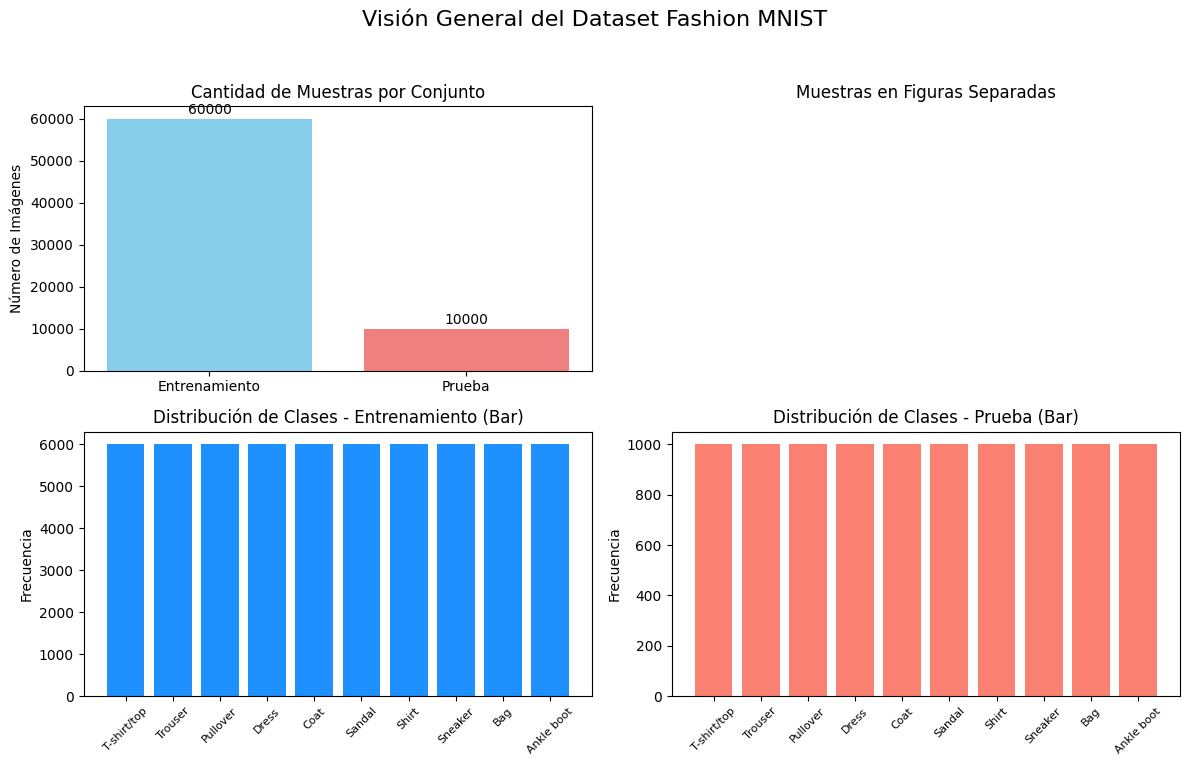


Mostrando algunas imágenes de ENTRENAMIENTO:


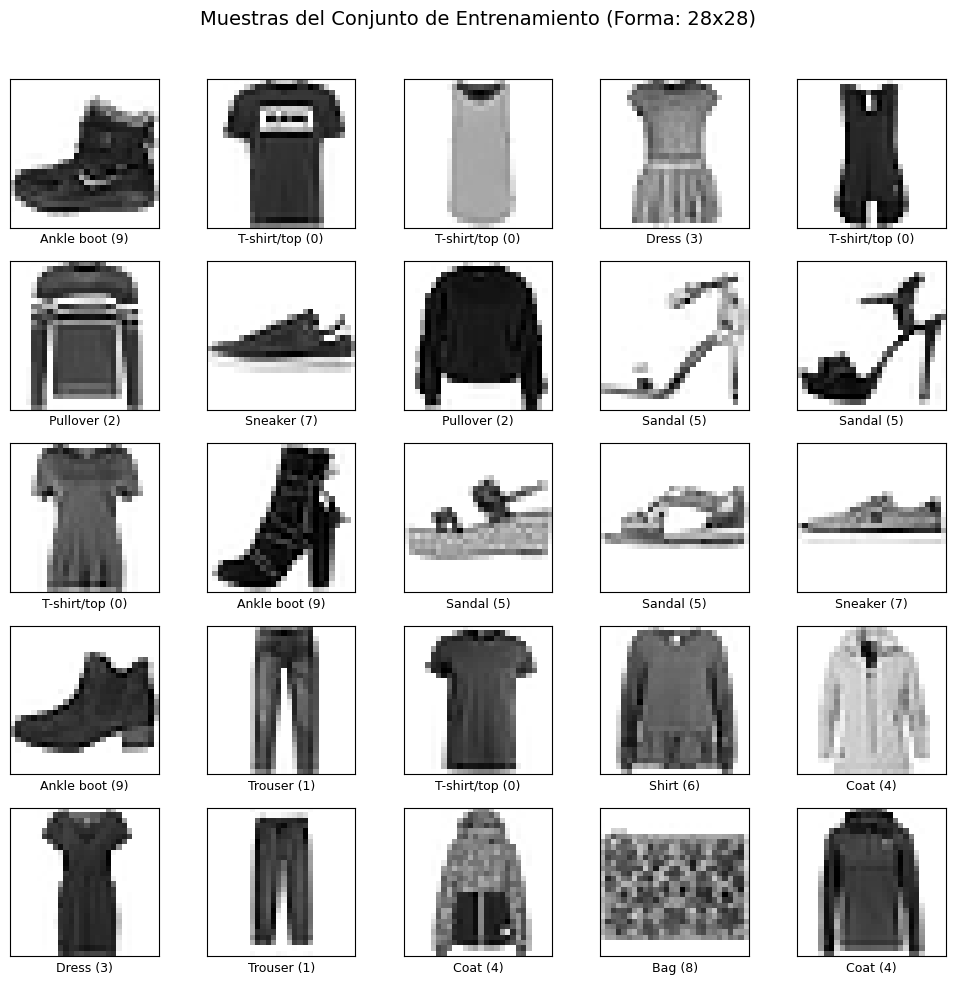


Mostrando algunas imágenes de PRUEBA:


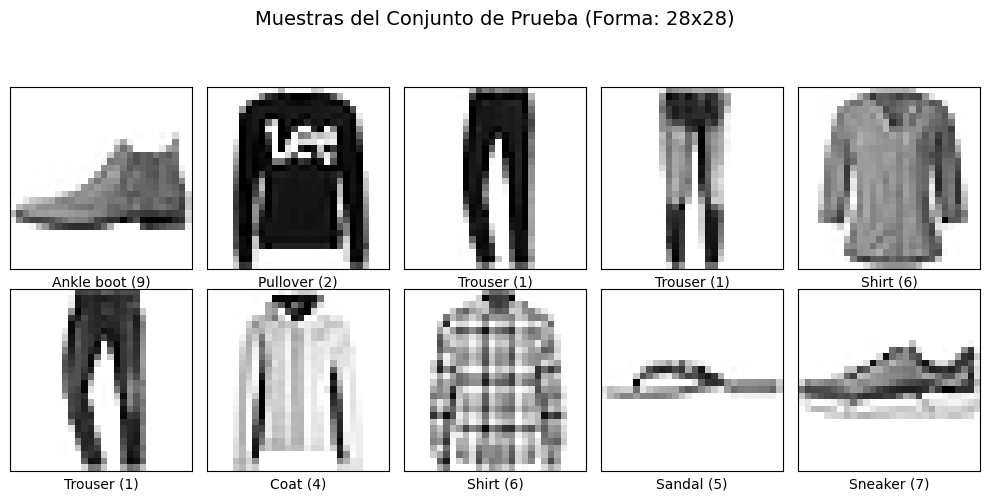

----------------------------------------
Visualizaciones Adicionales para las ETIQUETAS (y_train, y_test):
----------------------------------------

Mostrando la secuencia de las primeras 100 etiquetas de entrenamiento (y_train):


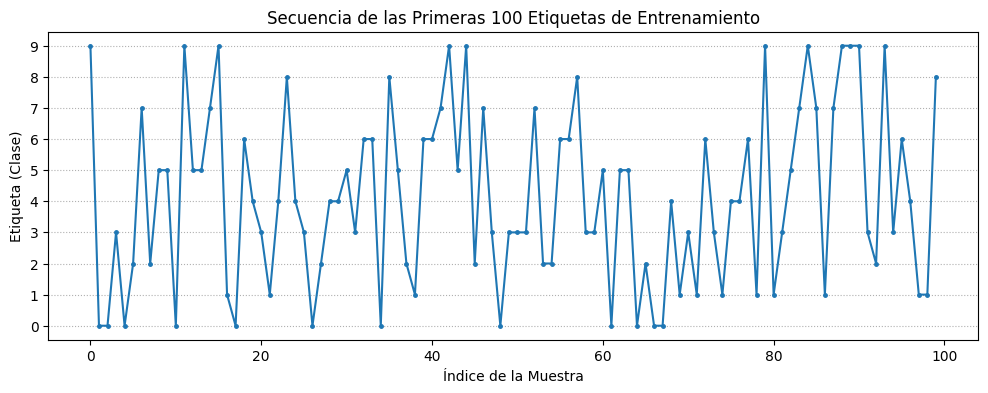

-> Observación: Este gráfico muestra el valor de la etiqueta para cada muestra consecutiva.
   Normalmente no revela patrones obvios, ya que el orden suele ser aleatorio.
Mostrando la Imagen en el Índice: 0
Etiqueta correspondiente: 9 (Ankle boot)
----------------------------------------
Representación como Array NumPy (Valores de Píxeles):
Forma del array de la imagen: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0

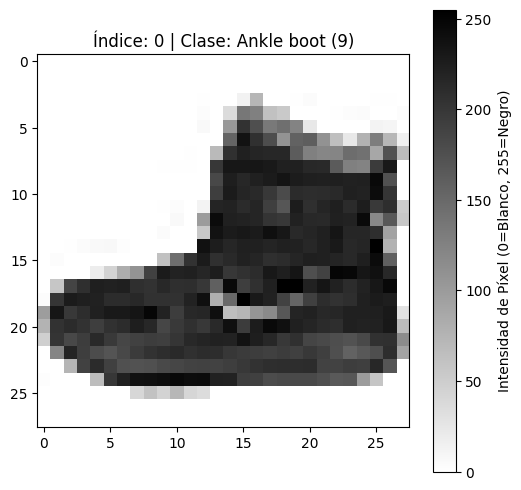


Generando histograma de intensidad de píxeles...


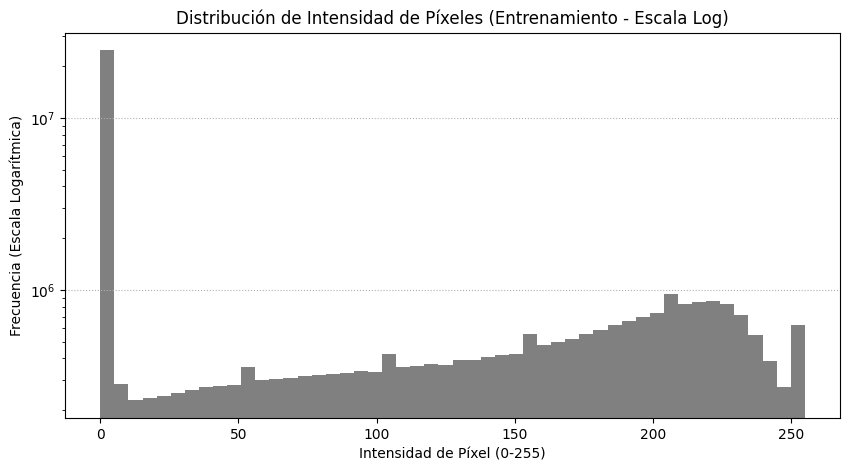

-> El histograma muestra la frecuencia de cada nivel de intensidad de píxel (0-255) en todo el conjunto de entrenamiento.
-> La escala logarítmica en el eje Y ayuda a visualizar la distribución incluso para intensidades menos frecuentes.


In [5]:
# --- Información Numérica (como referencia) ---
print("Resumen Numérico Rápido:")
print(f"  x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"  x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print("-" * 40)


# --- Preparación para Gráficos ---

# Nombres de las clases para las etiquetas (del 0 al 9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cantidades para el gráfico de barras
train_samples = len(x_train)
test_samples = len(x_test)


# --- Creación de Gráficos PRINCIPALES (Cantidad y Distribución) ---

# Crear una figura para los gráficos de cantidad y distribución (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Visión General del Dataset Fashion MNIST', fontsize=16)

# --- Gráfico 1: Cantidad de Muestras ---
axes[0, 0].bar(['Entrenamiento', 'Prueba'], [train_samples, test_samples], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Cantidad de Muestras por Conjunto')
axes[0, 0].set_ylabel('Número de Imágenes')
for i, count in enumerate([train_samples, test_samples]):
    axes[0, 0].text(i, count + 500, str(count), ha='center', va='bottom')

# --- Gráfico 2: Placeholder / Vacío ---
axes[0, 1].set_title('Muestras en Figuras Separadas')
axes[0, 1].axis('off')

# --- Gráfico 3: Distribución de Clases (Entrenamiento) - Bar Chart ---
train_labels, train_counts = np.unique(y_train, return_counts=True)
axes[1, 0].bar(class_names, train_counts, color='dodgerblue')
axes[1, 0].set_title('Distribución de Clases - Entrenamiento (Bar)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)

# --- Gráfico 4: Distribución de Clases (Prueba) - Bar Chart ---
test_labels, test_counts = np.unique(y_test, return_counts=True)
axes[1, 1].bar(class_names, test_counts, color='salmon')
axes[1, 1].set_title('Distribución de Clases - Prueba (Bar)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Creación de Figura SEPARADA para Muestras de Entrenamiento ---
print("\nMostrando algunas imágenes de ENTRENAMIENTO:")
plt.figure(figsize=(10,10))
plt.suptitle(f"Muestras del Conjunto de Entrenamiento (Forma: {x_train.shape[1]}x{x_train.shape[2]})", fontsize=14)
num_rows, num_cols = 5, 5
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[y_train[i]]} ({y_train[i]})", fontsize=9)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- Creación de Figura SEPARADA para Muestras de Prueba ---
print("\nMostrando algunas imágenes de PRUEBA:")
plt.figure(figsize=(10,5))
plt.suptitle(f"Muestras del Conjunto de Prueba (Forma: {x_test.shape[1]}x{x_test.shape[2]})", fontsize=14)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[y_test[i]]} ({y_test[i]})")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# --- NUEVO: Gráficos Adicionales para y_train / y_test ---

print("-" * 40)
print("Visualizaciones Adicionales para las ETIQUETAS (y_train, y_test):")
print("-" * 40)

# --- Gráfico Adicional 1: Line Plot de las primeras N etiquetas de Entrenamiento ---
print("\nMostrando la secuencia de las primeras 100 etiquetas de entrenamiento (y_train):")
num_labels_to_plot = 100
plt.figure(figsize=(12, 4))
plt.plot(np.arange(num_labels_to_plot), y_train[:num_labels_to_plot], marker='.', linestyle='-', markersize=5)
plt.title(f'Secuencia de las Primeras {num_labels_to_plot} Etiquetas de Entrenamiento')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Etiqueta (Clase)')
plt.yticks(np.arange(10)) # Asegura que los ticks sean los números de clase 0-9
plt.grid(True, axis='y', linestyle=':')
plt.show()
print("-> Observación: Este gráfico muestra el valor de la etiqueta para cada muestra consecutiva.")
print("   Normalmente no revela patrones obvios, ya que el orden suele ser aleatorio.")




# Nombres de las clases para referencia
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- Seleccionar una imagen específica ---
indice_imagen = 0 # Vamos a mostrar la primera imagen (puedes cambiar este número)
imagen_seleccionada = x_train[indice_imagen]
etiqueta_seleccionada = y_train[indice_imagen]
nombre_clase = class_names[etiqueta_seleccionada]

# --- 1. Mostrar la imagen como Array NumPy ---
print(f"Mostrando la Imagen en el Índice: {indice_imagen}")
print(f"Etiqueta correspondiente: {etiqueta_seleccionada} ({nombre_clase})")
print("-" * 40)
print("Representación como Array NumPy (Valores de Píxeles):")
print(f"Forma del array de la imagen: {imagen_seleccionada.shape}")
# Para que no ocupe toda la pantalla, podemos configurar NumPy para imprimir menos
# np.set_printoptions(threshold=50) # Descomenta si quieres limitar la salida
print(imagen_seleccionada)
print("-" * 40)


# --- 2. Mostrar la imagen con un Gráfico (Matplotlib) ---
print("Representación Gráfica de la Imagen:")

plt.figure(figsize=(6, 6)) # Crear una figura (ajusta tamaño si es necesario)

# Mostrar la imagen
# cmap=plt.cm.binary la muestra en blanco y negro (escala de grises invertida)
# cmap='gray' también es común para escala de grises estándar
plt.imshow(imagen_seleccionada, cmap=plt.cm.binary)

# Añadir un título descriptivo
plt.title(f"Índice: {indice_imagen} | Clase: {nombre_clase} ({etiqueta_seleccionada})")

# Añadir una barra de color para entender la escala de píxeles
plt.colorbar(label='Intensidad de Píxel (0=Blanco, 255=Negro)')

# Opcional: Ocultar los ejes numerados (ya que la forma 28x28 es más relevante)
# plt.xticks([])
# plt.yticks([])
plt.grid(False) # Quitar la cuadrícula que a veces aparece por defecto

# Mostrar el gráfico
plt.show()


# --- Histograma de Intensidad de Píxeles (Entrenamiento) ---

print("\nGenerando histograma de intensidad de píxeles...")

# Crear una nueva figura para el histograma con un tamaño específico
plt.figure(figsize=(10, 5)) # Ancho 10, Alto 5 pulgadas

# Calcular y dibujar el histograma:
# 1. x_train.flatten():
#    - `x_train` tiene la forma (60000, 28, 28) o (60000, 28, 28, 1) si ya añadiste el canal.
#    - `.flatten()` convierte este array multidimensional en un ÚNICO array largo (1D)
#      que contiene TODOS los valores de los píxeles de TODAS las 60,000 imágenes de entrenamiento,
#      uno después del otro. (Total: 60000 * 28 * 28 = 47,040,000 valores).
#    - Esto es necesario porque `plt.hist` opera sobre una secuencia de valores individuales.
#
# 2. bins=50:
#    - Divide el rango completo de valores posibles (0 a 255) en 50 intervalos o "contenedores" (bins) de igual tamaño.
#    - `plt.hist` contará cuántos valores de píxeles caen dentro de cada uno de estos 50 intervalos.
#    - Elegir el número de bins afecta la granularidad del histograma.
#
# 3. color='gray':
#    - Simplemente establece el color de las barras del histograma a gris, lo cual es temáticamente apropiado
#      para datos de imágenes en escala de grises.
#
# 4. log=True:
#    - Aplica una escala LOGARÍTMICA al eje Y (Frecuencia).
#    - **¡Esto es muy importante!** En muchas imágenes, los valores de píxeles extremos (como 0 para el fondo blanco)
#      son MUCHÍSIMO más frecuentes que los valores intermedios de gris.
#    - Sin una escala logarítmica, el pico en 0 sería tan alto que las barras para los otros valores
#      serían casi invisibles, haciendo difícil ver su distribución.
#    - La escala logarítmica comprime las frecuencias altas y expande las bajas, permitiendo
#      visualizar mejor la distribución completa, incluyendo los valores menos frecuentes.
plt.hist(x_train.flatten(), bins=50, color='gray', log=True)

# Añadir título y etiquetas a los ejes para claridad
plt.title('Distribución de Intensidad de Píxeles (Entrenamiento - Escala Log)')
plt.xlabel('Intensidad de Píxel (0-255)')
plt.ylabel('Frecuencia (Escala Logarítmica)') # Indicar explícitamente la escala log

# Añadir una cuadrícula horizontal punteada para facilitar la lectura en la escala log
plt.grid(True, axis='y', linestyle=':')

# Mostrar el gráfico generado
plt.show()

print("-> El histograma muestra la frecuencia de cada nivel de intensidad de píxel (0-255) en todo el conjunto de entrenamiento.")
print("-> La escala logarítmica en el eje Y ayuda a visualizar la distribución incluso para intensidades menos frecuentes.")

## **4. Preprocesamiento de Datos para el Modelo**

Tras la exploración inicial en la sección de EDA, procedemos ahora a preparar los datos de Fashion MNIST para que sean adecuados como entrada a nuestro modelo MLP. Este preprocesamiento es esencial para asegurar un entrenamiento eficiente y mejorar el rendimiento potencial del modelo.

Los pasos clave que realizaremos en esta sección son:

1.  **Normalización de Imágenes:** Los valores de los píxeles de las imágenes originales se encuentran en el rango [0, 255]. Escalaremos estos valores al rango [0, 1] dividiendo cada píxel por 255.0. Esta normalización ayuda a estabilizar el proceso de entrenamiento y a que el modelo converja más rápidamente, evitando que valores de píxeles muy altos dominen los cálculos.
2.  **Reformateo de Imágenes:** Añadiremos una dimensión extra al final de la forma (`shape`) de los arrays de imágenes para representar el canal de color. Aunque las imágenes son en escala de grises (un solo canal), muchas capas de Keras esperan explícitamente esta dimensión (formato `[altura, ancho, canales]`), por lo que transformaremos la forma de `(28, 28)` a `(28, 28, 1)`.
3.  **Codificación One-Hot de Etiquetas:** Las etiquetas de clase originales son números enteros del 0 al 9. Para utilizar la función de pérdida `categorical_crossentropy` (adecuada para clasificación multiclase) y la activación `softmax` en la capa de salida, necesitamos convertir estas etiquetas a un formato binario "one-hot". Cada etiqueta se transformará en un vector de 10 elementos con un '1' en la posición correspondiente a su clase y '0's en el resto.

A continuación, implementaremos estos pasos y visualizaremos su efecto en una muestra de los datos para verificar y comprender las transformaciones realizadas.



--- Iniciando Preprocesamiento ---
Muestras originales (imagen y etiqueta) guardadas para visualización.

1. Normalizando imágenes (Escalando a [0, 1])...
   Imágenes normalizadas.

2. Reformateando imágenes (añadiendo dimensión de canal)...
   Dimensión de canal añadida.
   Nueva forma datos entrenamiento (x_train): (60000, 28, 28, 1)

3. Codificando etiquetas (One-Hot Encoding)...
   Etiquetas convertidas a formato one-hot.
   Nueva forma etiquetas entrenamiento (y_train): (60000, 10)
----------------------------------------
Preprocesamiento completado.
----------------------------------------

--- Visualizando Efecto del Preprocesamiento en la Muestra 0 ---


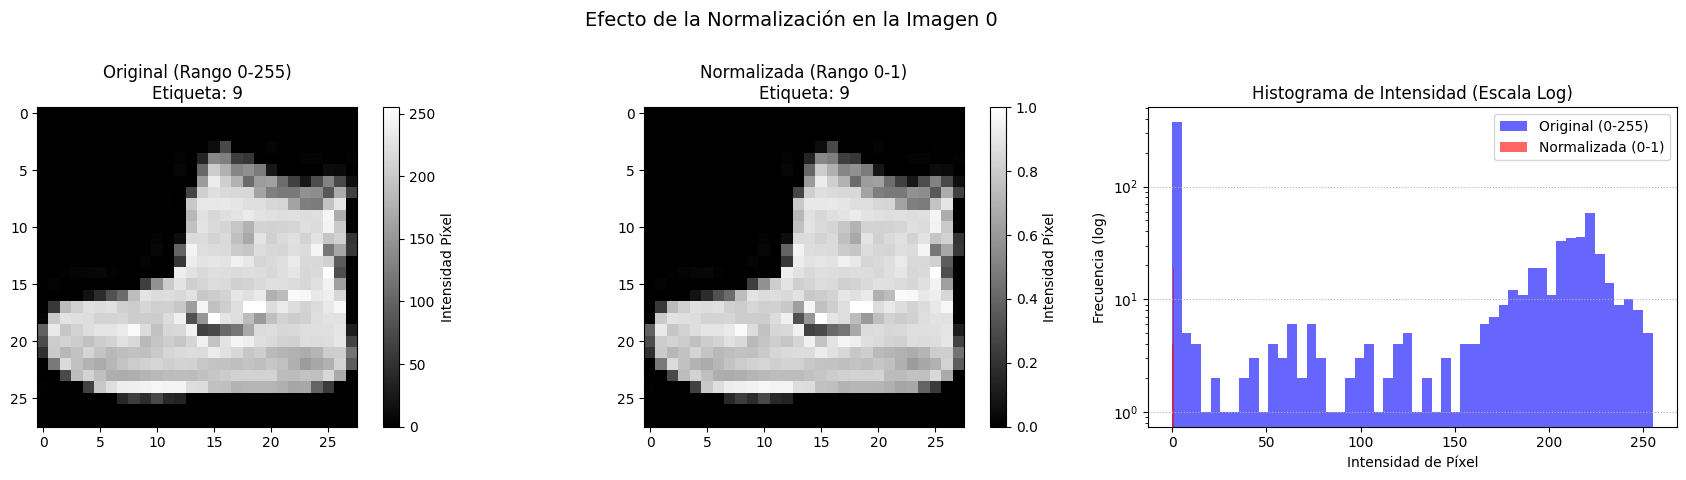

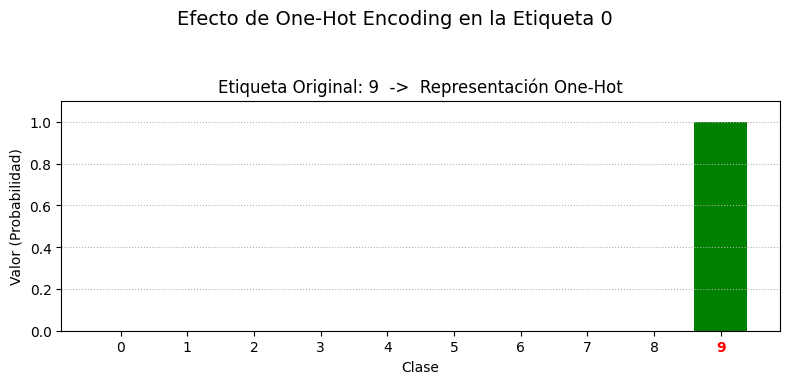

----------------------------------------


'Gráfico 1: Efecto de la Normalización en la Imagen 0 (Figura con 3 subplots)\nSubplot 1: Imagen Original (Rango 0-255)\n¿Qué muestra? Simplemente la primera imagen del dataset tal como se cargó, en escala de grises. La barra de color a la derecha indica que los píxeles más oscuros tienen valores cercanos a 255 y los más claros a 0.\n¿Qué significa? Nos da una referencia visual de cómo son los datos crudos antes de cualquier transformación numérica. Vemos la prenda de vestir (o el artículo) sobre un fondo predominantemente blanco.\n¿Importancia? Sirve como punto de partida visual. Nos permite confirmar que la imagen se cargó correctamente y tener una idea del rango original de los valores de los píxeles (confirmado por la barra de color).\nSubplot 2: Imagen Normalizada (Rango 0-1)\n¿Qué muestra? La misma imagen que antes, pero después de aplicar la normalización (dividir por 255.0). Visualmente, se ve idéntica a la original porque imshow ajusta automáticamente el rango de colores para 

In [6]:
# ---------------------------------------------------------------------------
## 4. Preprocesamiento de Datos para el Modelo
# ---------------------------------------------------------------------------
# Después de explorar los datos, preparamos la data para la red neuronal.
# Estos pasos son cruciales para un entrenamiento eficiente y efectivo.
print("\n--- Iniciando Preprocesamiento ---")

# --- Variables Globales Necesarias ---
# Asegúrate de que num_classes esté definido desde una celda anterior o defínelo aquí
if 'num_classes' not in locals():
    num_classes = 10 # Definir si no existe
    print(f"Variable 'num_classes' definida como {num_classes}.")

# --- Guardar muestras originales para visualización ---
# Guardamos una copia de la primera imagen y etiqueta ANTES de modificarlas.
if 'x_train' in locals() and x_train.ndim == 3 and x_train.size > 0: # Verificar que x_train sea 3D (antes de añadir canal)
    original_image_sample = x_train[0].copy() # Copia de la primera imagen (28x28 array)
    original_label_sample = y_train[0].copy() # Copia de la primera etiqueta (int)
    print("Muestras originales (imagen y etiqueta) guardadas para visualización.")
    sample_available = True
else:
    print("Advertencia: x_train/y_train no están en el formato esperado o vacíos. No se guardaron muestras originales.")
    original_image_sample = None
    original_label_sample = None
    sample_available = False

# --- Paso 1: Normalización de las Imágenes ---
print("\n1. Normalizando imágenes (Escalando a [0, 1])...")
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
print("   Imágenes normalizadas.")

# --- Paso 2: Reformateo de las Imágenes ---
print("\n2. Reformateando imágenes (añadiendo dimensión de canal)...")
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)
print("   Dimensión de canal añadida.")
print(f"   Nueva forma datos entrenamiento (x_train): {x_train.shape}")

# --- Paso 3: Codificación One-Hot de las Etiquetas ---
print("\n3. Codificando etiquetas (One-Hot Encoding)...")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("   Etiquetas convertidas a formato one-hot.")
print(f"   Nueva forma etiquetas entrenamiento (y_train): {y_train.shape}")

print("-" * 40)
print("Preprocesamiento completado.")
print("-" * 40)

# --- Visualización del Efecto del Preprocesamiento (Usando la Muestra Guardada) ---

if sample_available:
    print("\n--- Visualizando Efecto del Preprocesamiento en la Muestra 0 ---")

    # --- Visualización Paso 1: Normalización ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Efecto de la Normalización en la Imagen 0', fontsize=14)

    # Imagen Original
    im_orig = axes[0].imshow(original_image_sample, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title(f'Original (Rango 0-255)\nEtiqueta: {original_label_sample}')
    axes[0].grid(False)
    fig.colorbar(im_orig, ax=axes[0], label='Intensidad Píxel')

    # Imagen Normalizada (Tomamos la primera imagen de x_train ya procesado)
    # Usamos .squeeze() para quitar la dimensión del canal para imshow
    im_norm = axes[1].imshow(x_train[0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[1].set_title(f'Normalizada (Rango 0-1)\nEtiqueta: {original_label_sample}')
    axes[1].grid(False)
    fig.colorbar(im_norm, ax=axes[1], label='Intensidad Píxel')

    # Histograma Comparativo
    axes[2].hist(original_image_sample.flatten(), bins=50, color='blue', alpha=0.6, label='Original (0-255)', log=True)
    axes[2].hist(x_train[0].flatten(), bins=50, color='red', alpha=0.6, label='Normalizada (0-1)', log=True)
    axes[2].set_title('Histograma de Intensidad (Escala Log)')
    axes[2].set_xlabel('Intensidad de Píxel')
    axes[2].set_ylabel('Frecuencia (log)')
    axes[2].legend()
    axes[2].grid(True, axis='y', linestyle=':')

    plt.tight_layout(rect=[0, 0.03, 1, 0.93]) # Ajuste para suptitle
    plt.show()

    # --- Visualización Paso 3: One-Hot Encoding ---
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    fig.suptitle('Efecto de One-Hot Encoding en la Etiqueta 0', fontsize=14)

    # Obtener la etiqueta one-hot procesada para la muestra 0
    one_hot_label = y_train[0]
    classes = np.arange(num_classes) # Clases 0 a 9

    ax.bar(classes, one_hot_label, color='green')
    ax.set_title(f'Etiqueta Original: {original_label_sample}  ->  Representación One-Hot')
    ax.set_xlabel('Clase')
    ax.set_ylabel('Valor (Probabilidad)')
    ax.set_xticks(classes) # Asegurar que se muestren todas las clases 0-9
    ax.set_ylim(0, 1.1) # Límite eje Y hasta un poco más de 1
    ax.grid(True, axis='y', linestyle=':')

    # Marcar la clase correcta
    correct_class_index = np.argmax(one_hot_label)
    ax.get_xticklabels()[correct_class_index].set_color("red")
    ax.get_xticklabels()[correct_class_index].set_fontweight("bold")


    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

else:
    print("\nNo se generaron visualizaciones de preprocesamiento porque las muestras originales no estaban disponibles.  Reiniciar el Kernel y Correr todo denuevo")


print("-" * 40)
# ---------------------------------------------------------------------------
# Fin de la Sección de Preprocesamiento y Visualización
# ---------------------------------------------------------------------------

"""Gráfico 1: Efecto de la Normalización en la Imagen 0 (Figura con 3 subplots)
Subplot 1: Imagen Original (Rango 0-255)
¿Qué muestra? Simplemente la primera imagen del dataset tal como se cargó, en escala de grises. La barra de color a la derecha indica que los píxeles más oscuros tienen valores cercanos a 255 y los más claros a 0.
¿Qué significa? Nos da una referencia visual de cómo son los datos crudos antes de cualquier transformación numérica. Vemos la prenda de vestir (o el artículo) sobre un fondo predominantemente blanco.
¿Importancia? Sirve como punto de partida visual. Nos permite confirmar que la imagen se cargó correctamente y tener una idea del rango original de los valores de los píxeles (confirmado por la barra de color).
Subplot 2: Imagen Normalizada (Rango 0-1)
¿Qué muestra? La misma imagen que antes, pero después de aplicar la normalización (dividir por 255.0). Visualmente, se ve idéntica a la original porque imshow ajusta automáticamente el rango de colores para mostrarla. Sin embargo, la barra de color ahora indica que los valores van de 0.0 (blanco) a 1.0 (negro).
¿Qué significa? Demuestra que, aunque la apariencia visual no cambie drásticamente, los valores numéricos subyacentes que representan la imagen ahora están confinados al intervalo [0, 1].
¿Importancia? Aunque visualmente no sea impactante, es crucial para entender que la representación numérica que alimentará a la red neuronal ha cambiado. Este nuevo rango [0, 1] es preferible para los algoritmos de optimización (como Adam) porque evita problemas de escala y puede llevar a una convergencia más rápida y estable durante el entrenamiento.
Subplot 3: Histograma de Intensidad (Original vs. Normalizada)
¿Qué muestra? Compara la distribución de los valores de los píxeles de la primera imagen antes (azul) y después (rojo) de la normalización. El eje X representa la intensidad del píxel y el eje Y (en escala logarítmica) representa cuántos píxeles tienen esa intensidad.
¿Qué significa? Vemos que la forma de la distribución es la misma, pero el rango en el eje X cambia drásticamente. El histograma azul se extiende de 0 a 255, mientras que el rojo se comprime entre 0 y 1. El pico alto cerca de 0 (fondo blanco) es evidente en ambos. La escala logarítmica nos permite ver también las frecuencias de los tonos grises intermedios.
¿Importancia? Este gráfico cuantifica el efecto de la normalización. Confirma que la operación simplemente reescaló los valores sin alterar la distribución relativa de las intensidades. Es la prueba visual de que la transformación matemática (dividir por 255) se aplicó correctamente a todos los píxeles de esa imagen y cambió su rango.
Gráfico 2: Efecto de One-Hot Encoding en la Etiqueta 0 (Figura con 1 subplot)
¿Qué muestra? Un diagrama de barras con 10 barras, correspondientes a las 10 clases posibles (0 a 9). Solo una barra tiene altura 1, mientras que las demás tienen altura 0. El título indica cuál era la etiqueta numérica original y la barra roja/negrita en el eje X marca la clase correspondiente a la barra alta.
¿Qué significa? Muestra cómo la etiqueta numérica original (por ejemplo, si original_label_sample era 9) se transforma en un vector binario. Este vector representa una distribución de probabilidad donde estamos 100% seguros (valor 1) de que la imagen pertenece a esa clase específica (la clase 9 en el ejemplo) y 0% seguro de que pertenece a cualquier otra clase.
¿Importancia? Visualiza la transformación fundamental de la etiqueta para que sea compatible con la función de pérdida categorical_crossentropy y la capa de salida softmax de la red neuronal. La red neuronal aprenderá a producir un vector de salida similar (con probabilidades para cada clase), y la función de pérdida comparará ese vector predicho con este vector "verdadero" (one-hot) para calcular el error y ajustar los pesos. Entender este formato es clave para comprender cómo funciona la clasificación multiclase en este contexto.
"""

--- Asumiendo que los datos ya están cargados y preprocesados ---

              INICIANDO TEST HARNESS

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_D0.5 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5 ---
   Test Loss: 0.3802, Test Accuracy: 0.8621
   Weighted Precision: 0.8644, Recall: 0.8621, F1-Score: 0.8584
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_D0.5 -> Accuracy: 0.862100 (Anterior: -1.000000) ***
--------------------------------------------------

--- Creando Modelo: 'MLP_Sigmoid_128_64_D0.5' ---
   Activación Oculta: sigmoid
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_Sigmoid_128_64_D0.5' creado.

--- Entrenando Modelo: MLP_Sigmoid_128_64_D0.5 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_Sigmoid_128_64_D0.5 ---
   Test Loss: 0.3888, Test Accuracy: 0.8589
   Weighted Precision: 0.8604, Recall: 0.8589, F1-Score: 0.8574
--------------------------------------------------

--- Creando Modelo: 'MLP_Tanh_128_64_D0.5' ---
   Activación Oculta: tanh
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_Tanh_128_64_D0.5' creado.

--- Entrenando Modelo: MLP_Tanh_128_64_D0.5 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_Tanh_128_64_D0.5 ---
   Test Loss: 0.4033, Test Accuracy: 0.8580
   Weighted Precision: 0.8592, Recall: 0.8580, F1-Score: 0.8562
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_256_128_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [256, 128]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_256_128_D0.5' creado.

--- Entrenando Modelo: MLP_ReLU_256_128_D0.5 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_256_128_D0.5 ---
   Test Loss: 0.3493, Test Accuracy: 0.8730
   Weighted Precision: 0.8737, Recall: 0.8730, F1-Score: 0.8705
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_256_128_D0.5 -> Accuracy: 0.873000 (Anterior: 0.862100) ***
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2 ---
   Test Loss: 0.3486, Test Accuracy: 0.8765
   Weighted Precision: 0.8780, Recall: 0.8765, F1-Score: 0.8766
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_D0.2 -> Accuracy: 0.876500 (Anterior: 0.873000) ***
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.0' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: Ninguno
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.0' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_D0.0 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.0 ---
   Test Loss: 0.3386, Test Accuracy: 0.8843
   Weighted Precision: 0.8840, Recall: 0.8843, F1-Score: 0.8833
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_D0.0 -> Accuracy: 0.884300 (Anterior: 0.876500) ***
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_D0.5' creado.

--- Entrenando Modelo: MLP_ReLU_128_D0.5 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_D0.5 ---
   Test Loss: 0.3586, Test Accuracy: 0.8741
   Weighted Precision: 0.8771, Recall: 0.8741, F1-Score: 0.8709
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_LR0.01' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_LR0.01' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_D0.5_LR0.01 (LR=0.01, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_LR0.01 ---
   Test Loss: 0.5275, Test Accuracy: 0.8209
   Weighted Precision: 0.8437, Recall: 0.8209, F1-Score: 0.8060
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_LR0.0001' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_LR0.0001' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_D0.5_LR0.0001 (LR=0.0001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_LR0.0001 ---
   Test Loss: 0.4234, Test Accuracy: 0.8460
   Weighted Precision: 0.8447, Recall: 0.8460, F1-Score: 0.8439
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_SGD' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_SGD' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_D0.5_SGD (LR=0.01, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_SGD ---
   Test Loss: 0.5017, Test Accuracy: 0.8177
   Weighted Precision: 0.8140, Recall: 0.8177, F1-Score: 0.8125
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_BS32' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_BS32' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_D0.5_BS32 (LR=0.001, BS=32, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_BS32 ---
   Test Loss: 0.3711, Test Accuracy: 0.8656
   Weighted Precision: 0.8667, Recall: 0.8656, F1-Score: 0.8652
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_BS256' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_BS256' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_D0.5_BS256 (LR=0.001, BS=256, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_BS256 ---
   Test Loss: 0.3626, Test Accuracy: 0.8728
   Weighted Precision: 0.8724, Recall: 0.8728, F1-Score: 0.8705
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5 ---
   Test Loss: 0.3547, Test Accuracy: 0.8694
   Weighted Precision: 0.8740, Recall: 0.8694, F1-Score: 0.8699
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.0' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: Ninguno
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.0' creado.

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.0 (LR=0.001, BS=128, Epochs=15) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   Entrenamiento completado.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.0 ---
   Test Loss: 0.4061, Test Accuracy: 0.8724
   Weighted Precision: 0.8773, Recall: 0.8724, F1-Score: 0.8717
--------------------------------------------------

              TEST HARNESS COMPLETADO

--- Resultados Comparativos ---

Tabla Resumen de Métricas (Ordenada por Accuracy):


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s)
5,MLP_ReLU_128_64_D0.0,0.338645,0.8843,0.884018,0.8843,0.883255,42.97
4,MLP_ReLU_128_64_D0.2,0.348593,0.8765,0.878049,0.8765,0.876618,45.82
6,MLP_ReLU_128_D0.5,0.358624,0.8741,0.877136,0.8741,0.870884,50.05
3,MLP_ReLU_256_128_D0.5,0.349270,0.8730,0.873708,0.8730,0.870480,67.90
11,MLP_ReLU_128_64_D0.5_BS256,0.362565,0.8728,0.872361,0.8728,0.870490,36.03
13,MLP_ReLU_128_64_BN_D0.0,0.406092,0.8724,0.877338,0.8724,0.871655,48.07
12,MLP_ReLU_128_64_BN_D0.5,0.354683,0.8694,0.874044,0.8694,0.869880,50.61
10,MLP_ReLU_128_64_D0.5_BS32,0.371100,0.8656,0.866734,0.8656,0.865245,150.32
0,MLP_ReLU_128_64_D0.5,0.380202,0.8621,0.864394,0.8621,0.858417,46.19
1,MLP_Sigmoid_128_64_D0.5,0.388819,0.8589,0.860357,0.8589,0.857447,44.43



Gráficos Comparativos de Curvas de Aprendizaje:


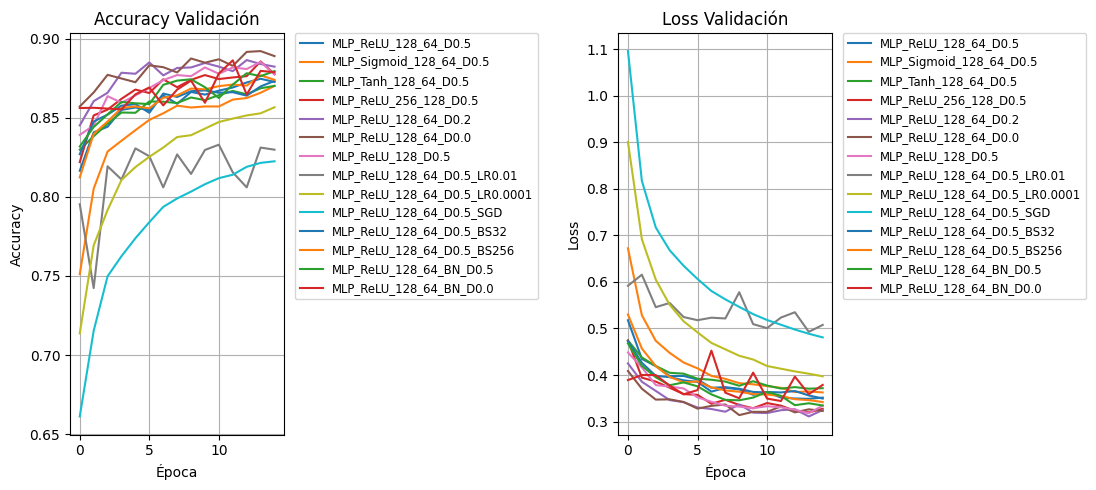


--- Fin del Análisis Comparativo ---


In [7]:
# ---------------------------------------------------------------------------
# Sección 1: Constantes de HyperParametros
# (Estos se usarán si no se especifican en la config del modelo)
# ---------------------------------------------------------------------------
DEFAULT_NUM_CLASSES = 10
DEFAULT_INPUT_SHAPE_ORIGINAL = (28, 28, 1)
DEFAULT_EPOCHS = 15
DEFAULT_BATCH_SIZE = 128
DEFAULT_LEARNING_RATE = 0.001
DEFAULT_VALIDATION_SPLIT = 0.1
DEFAULT_DROPOUT_RATE = 0.5 # Mantener como referencia base

# ---------------------------------------------------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (UNA SOLA VEZ)
# (El código es el mismo que antes - asumimos que se ejecutó)
# ... (código de carga y preprocesamiento aquí) ...
# Asegúrate de tener x_train, y_train, x_test, y_test, y_test_labels listos
print("--- Asumiendo que los datos ya están cargados y preprocesados ---")
num_classes = DEFAULT_NUM_CLASSES # Usar la variable global si no la tienes ya
input_shape_original = DEFAULT_INPUT_SHAPE_ORIGINAL
# (Asegúrate de tener x_train, y_train, x_test, y_test, y_test_labels)
if 'x_train' not in locals():
     print("ERROR: Los datos (x_train, etc.) no parecen estar cargados.")
     # Detener o cargar datos aquí
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# Sección 3: Función Flexible para Crear Modelos MLP (Actualizada)
# ---------------------------------------------------------------------------
def create_flexible_mlp(model_name='mlp',
                        hidden_activation='relu',
                        neurons_per_layer=[128, 64],
                        dropout_rate=0.5,
                        use_batch_norm=False, # <--- Nuevo parámetro
                        input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL,
                        num_classes=DEFAULT_NUM_CLASSES):
    """Crea un MLP con configuración flexible, incluyendo Batch Norm opcional."""
    print(f"\n--- Creando Modelo: '{model_name}' ---")
    print(f"   Activación Oculta: {hidden_activation}")
    print(f"   Neuronas/Capa: {neurons_per_layer}")
    print(f"   Dropout Rate: {dropout_rate if dropout_rate > 0 else 'Ninguno'}")
    print(f"   Batch Norm: {'Sí' if use_batch_norm else 'No'}") # <--- Informar si se usa BN

    model = keras.Sequential(name=model_name)
    model.add(layers.Flatten(input_shape=input_shape_orig, name=f"{model_name}_flatten"))

    for i, neurons in enumerate(neurons_per_layer):
        layer_name = f"{model_name}_hidden_{i+1}"
        bn_name = f"{model_name}_bn_{i+1}"
        dropout_name = f"{model_name}_dropout_{i+1}"

        # Capa Densa
        model.add(layers.Dense(neurons, name=layer_name, use_bias=not use_batch_norm)) # Bias puede ser redundante con BN

        # Añadir Batch Normalization ANTES de la activación (práctica común)
        if use_batch_norm:
            model.add(layers.BatchNormalization(name=bn_name)) # <--- Añadido BN

        # Añadir Activación
        model.add(layers.Activation(hidden_activation, name=f"{layer_name}_activation")) # <--- Usar capa Activation

        # Añadir Dropout
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate, name=dropout_name))

    # Capa de salida
    model.add(layers.Dense(num_classes, activation="softmax", name=f"{model_name}_output"))
    print(f"Modelo '{model_name}' creado.")
    return model

# ---------------------------------------------------------------------------
# Sección 4: Función para Evaluar un Modelo Entrenado (Sin cambios)
# (El código es el mismo que antes)
def evaluate_model(model, x_test, y_test, y_test_labels, history, training_time):
     # ... (código de evaluate_model sin cambios) ...
    print(f"\n--- Evaluando Modelo: {model.name} ---")
    score = model.evaluate(x_test, y_test, verbose=0)
    loss = score[0]; accuracy = score[1]
    print(f"   Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    y_pred_prob = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test_labels, y_pred_classes, average='weighted', zero_division=0)
    print(f"   Weighted Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    results = {'Model Name': model.name, 'Loss': loss, 'Accuracy': accuracy,
               'Precision (Weighted)': precision, 'Recall (Weighted)': recall, 'F1-Score (Weighted)': f1,
               'Training Time (s)': training_time, 'History': history.history}
    return results
# ---------------------------------------------------------------------------

# ===========================================================================
# Sección 5: TEST HARNESS - Definición y Ejecución (Actualizada)
# ===========================================================================

# --- Define AQUÍ las configuraciones de modelos a probar ---
# NUEVOS PARÁMETROS POSIBLES: 'lr', 'optimizer', 'batch_size', 'epochs', 'batch_norm'
models_to_test = [
    # --- Baseline y Variaciones de Activación (IL 1.2) ---
    {'name': 'MLP_ReLU_128_64_D0.5', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5},
    {'name': 'MLP_Sigmoid_128_64_D0.5', 'activation': 'sigmoid', 'neurons': [128, 64], 'dropout': 0.5},
    {'name': 'MLP_Tanh_128_64_D0.5', 'activation': 'tanh', 'neurons': [128, 64], 'dropout': 0.5},

    # --- Variaciones de Arquitectura/Dropout (IL 1.3) ---
    {'name': 'MLP_ReLU_256_128_D0.5', 'activation': 'relu', 'neurons': [256, 128], 'dropout': 0.5},
    {'name': 'MLP_ReLU_128_64_D0.2', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2},
    {'name': 'MLP_ReLU_128_64_D0.0', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.0}, # Sin Dropout
    {'name': 'MLP_ReLU_128_D0.5', 'activation': 'relu', 'neurons': [128], 'dropout': 0.5}, # Una capa oculta

    # --- Variaciones de Optimizador/LR (IL 1.3) ---
    {'name': 'MLP_ReLU_128_64_D0.5_LR0.01', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'lr': 0.01},
    {'name': 'MLP_ReLU_128_64_D0.5_LR0.0001','activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'lr': 0.0001},
    {'name': 'MLP_ReLU_128_64_D0.5_SGD', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'optimizer': 'sgd', 'lr': 0.01}, # SGD suele necesitar LR diferente

    # --- Variaciones de Tamaño de Lote (IL 1.1 / IL 1.3) ---
    {'name': 'MLP_ReLU_128_64_D0.5_BS32', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_size': 32},
    {'name': 'MLP_ReLU_128_64_D0.5_BS256', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_size': 256},

    # --- Prueba con Batch Normalization (IL 1.3) ---
    {'name': 'MLP_ReLU_128_64_BN_D0.5', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_norm': True},
    {'name': 'MLP_ReLU_128_64_BN_D0.0', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.0, 'batch_norm': True}, # BN sin Dropout

    # --- Variación de Épocas (Recomendado ejecutar por separado o analizar curvas) ---
    # {'name': 'MLP_ReLU_128_64_D0.5_EP30', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'epochs': 30},
]

# --- Listas para almacenar resultados ---
all_results = []
all_histories = {}

# --- Inicializar variables para rastrear el mejor modelo ---
best_accuracy_so_far = -1.0  # Inicializar con un valor bajo

# --- Bucle principal del Test Harness (Actualizado) ---
print("\n" + "="*60); print("              INICIANDO TEST HARNESS"); print("="*60)

for config in models_to_test:
    start_time = time.time()

    # --- Obtener parámetros específicos de la config o usar defaults ---
    current_lr = config.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name = config.get('optimizer', 'adam') # 'adam' por defecto
    current_batch_size = config.get('batch_size', DEFAULT_BATCH_SIZE)
    current_epochs = config.get('epochs', DEFAULT_EPOCHS)
    current_dropout_rate = config.get('dropout', DEFAULT_DROPOUT_RATE)
    use_bn = config.get('batch_norm', False) # False por defecto

    # 1. Crear el modelo
    model = create_flexible_mlp(
        model_name=config['name'],
        hidden_activation=config['activation'],
        neurons_per_layer=config['neurons'],
        dropout_rate=current_dropout_rate,
        use_batch_norm=use_bn
    )

    # 2. Compilar el modelo con parámetros actuales
    if current_optimizer_name.lower() == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    elif current_optimizer_name.lower() == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=current_lr) # Podrías añadir momentum aquí
    # Añadir más optimizadores si quieres (RMSprop, etc.)
    else:
        print(f"Advertencia: Optimizador '{current_optimizer_name}' no reconocido, usando Adam con LR={current_lr}")
        optimizer = keras.optimizers.Adam(learning_rate=current_lr)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    # 3. Entrenar el modelo con parámetros actuales
    print(f"\n--- Entrenando Modelo: {model.name} (LR={current_lr}, BS={current_batch_size}, Epochs={current_epochs}) ---")
    history = model.fit(
        x_train, y_train,
        batch_size=current_batch_size,
        epochs=current_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT, # Mantener split fijo para comparar
        verbose=0
    )
    print("   Entrenamiento completado.")

    end_time = time.time()
    training_time = round(end_time - start_time, 2)

    # 4. Evaluar el modelo
    results = evaluate_model(model, x_test, y_test, y_test_labels, history, training_time)

    # 5. Guardar resultados
    all_results.append(results)
    all_histories[model.name] = history.history

    # --- INICIO: Lógica para rastrear el mejor modelo (Asegúrate de inicializar estas variables ANTES del bucle) ---
    # Ejemplo de inicialización ANTES del bucle:
    # best_accuracy_so_far = -1.0
    # best_model_object = None
    # best_model_name = None

    if results['Accuracy'] > best_accuracy_so_far:
        print(f"*** ¡Nuevo mejor modelo encontrado! {model.name} -> Accuracy: {results['Accuracy']:.6f} (Anterior: {best_accuracy_so_far:.6f}) ***")
        best_accuracy_so_far = results['Accuracy']
        best_model_object = model # Guarda la REFERENCIA al objeto modelo ENTRENADO actual
        best_model_name = model.name
    # --- FIN: Lógica para rastrear el mejor modelo ---

    print("-" * 50)

print("\n" + "="*60); print("              TEST HARNESS COMPLETADO"); print("="*60)

# ---------------------------------------------------------------------------
# Sección 6: Presentación Comparativa de Resultados (Sin cambios)
# (El código es el mismo que antes)
# ... (código para generar tabla y gráficos comparativos aquí) ...
print("\n--- Resultados Comparativos ---")
results_df = pd.DataFrame(all_results)
results_df_display = results_df.drop(columns=['History']).sort_values(by='Accuracy', ascending=False)
print("\nTabla Resumen de Métricas (Ordenada por Accuracy):")
display(results_df_display)
print("\nGráficos Comparativos de Curvas de Aprendizaje:")
num_models = len(all_histories)
plt.figure(figsize=(14, 5)) # Hacer figura más compacta
plt.subplot(1, 2, 1); # Accuracy
for name, h in all_histories.items(): plt.plot(h['val_accuracy'], label=name)
plt.title('Accuracy Validación'); plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small'); plt.grid(True)
plt.subplot(1, 2, 2); # Loss
for name, h in all_histories.items(): plt.plot(h['val_loss'], label=name)
plt.title('Loss Validación'); plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small'); plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.8, 1]) # Ajustar layout para leyenda externa
plt.show()
print("\n--- Fin del Análisis Comparativo ---")





      GUARDADO Y RESUMEN DEL MEJOR MODELO ENCONTRADO

El mejor modelo encontrado fue: 'MLP_ReLU_128_64_D0.0' con Accuracy: 0.884300

--- Guardando el mejor modelo en: 'MLP_ReLU_128_64_D0.0_best_model.keras' ---
   Modelo guardado exitosamente.

Resumen de la Arquitectura del Modelo: MLP_ReLU_128_64_D0.0


Model: "MLP_ReLU_128_64_D0.0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MLP_ReLU_128_64_D0.0_flatten    │ (None, 784)            │             0 │
│ (Flatten)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.0_hidden_1   │ (None, 128)            │       100,480 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.0_hidden_1_… │ (None, 128)            │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.0_hidden_2   │ (None, 64)             │         8,256 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.0_hidden_2_… │ (None, 64)             │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_D0.0_output     │ (None, 10)             │           650 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)


Visualización Gráfica del Modelo:


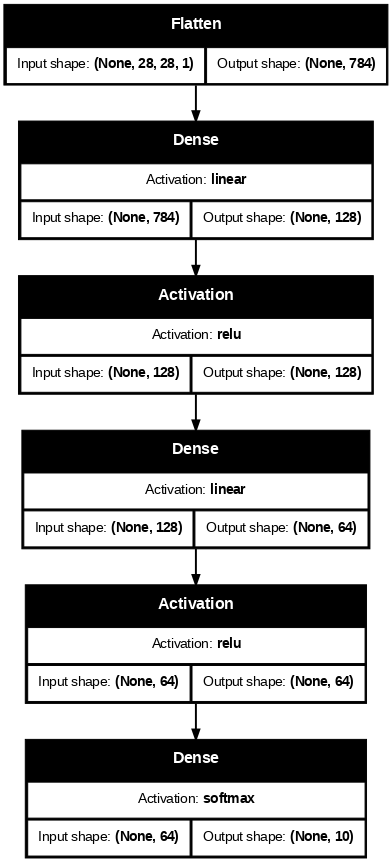


--- Fin de la sección del mejor modelo ---


In [8]:
# ===========================================================================
# Sección 6: Mostrar Resumen del Mejor Modelo
# ===========================================================================

print("\n" + "="*60)
print("      GUARDADO Y RESUMEN DEL MEJOR MODELO ENCONTRADO")
print("="*60)

if best_model_object is not None:
    print(f"\nEl mejor modelo encontrado fue: '{best_model_name}' con Accuracy: {best_accuracy_so_far:.6f}")

    # --- Guardar el modelo completo (arquitectura, pesos, optimizador) ---
    save_path = f"{best_model_name}_best_model.keras" # Nombre de archivo incluye nombre del modelo
    print(f"\n--- Guardando el mejor modelo en: '{save_path}' ---")
    try:
        best_model_object.save(save_path)
        print("   Modelo guardado exitosamente.")
    except Exception as e:
        print(f"   ERROR al guardar el modelo: {e}")


    # --- Mostrar Resumen y Gráfico (usando el objeto ya guardado en best_model_object) ---
    print(f"\nResumen de la Arquitectura del Modelo: {best_model_name}")
    best_model_object.summary() # Llama a summary() sobre el modelo guardado en la variable

    print("\nVisualización Gráfica del Modelo:")
    try:
        # Intenta generar y MOSTRAR el gráfico directamente
        display(tf.keras.utils.plot_model(
            best_model_object, # Usa la variable que contiene el mejor modelo
            show_shapes=True,
            show_layer_activations=True,
            rankdir='TB', # 'TB' for top-to-bottom layout
            dpi=70)
        )
    except Exception as e:
        print(f"No se pudo generar el gráfico del modelo. Error DETALLADO: {e}")

else:
    print("\nNo se encontró un mejor modelo durante la ejecución (posiblemente el bucle no corrió o hubo un error).")

print(f"\n--- Fin de la sección del mejor modelo ---")
# ---------------------------------------------------------------------------


--- Análisis y Ajuste del Mejor Modelo: MLP_ReLU_128_64_D0.0 ---

1. Analizando Curvas de Aprendizaje Originales (15 Épocas):


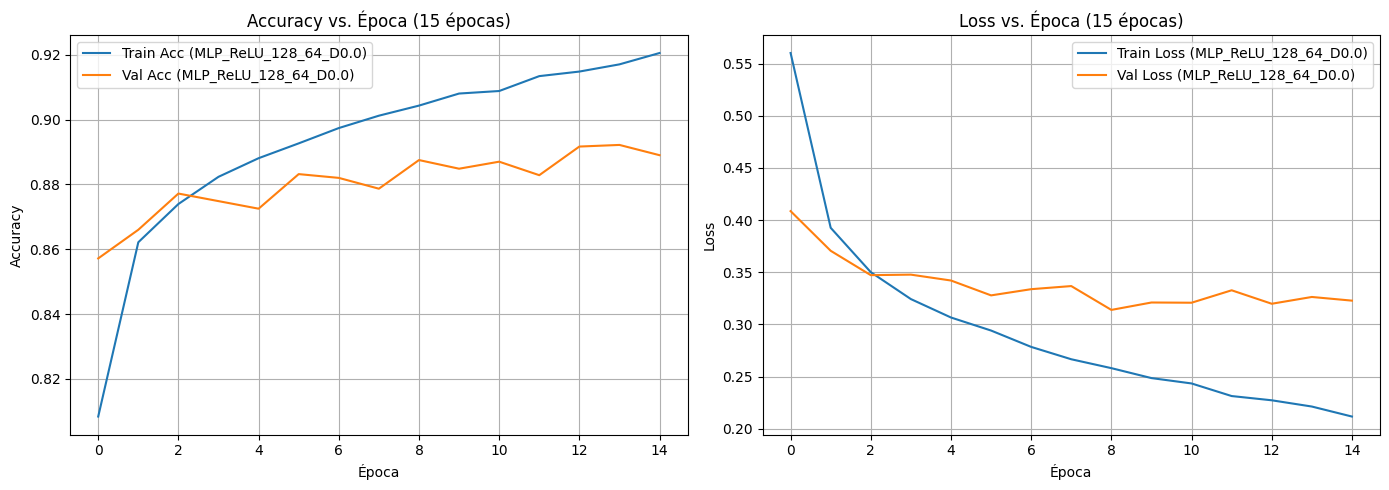

   (INTERPRETAR GRÁFICO ANTERIOR)

2. Re-entrenando con más épocas y Early Stopping...

--- Creando Modelo: 'MLP_ReLU_128_64_D0.0_Adjusted' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: Ninguno
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.0_Adjusted' creado.
   Modelo 'MLP_ReLU_128_64_D0.0_Adjusted' recreado y compilado.

   Iniciando entrenamiento ajustado (max 50 épocas, BS=128)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7359 - loss: 0.7739 - val_accuracy: 0.8505 - val_loss: 0.4133
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8578 - loss: 0.4009 - val_accuracy: 0.8688 - val_loss: 0.3676
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8699 - loss: 0.3568 - val_accuracy: 0.8728 - val_loss: 0.3528
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8815 - loss: 0.3246 - val_accuracy: 0.8812 - val_loss: 0.3346
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8878 - loss: 0.3059 - val_accuracy: 0.8747 - val_loss: 0.3364
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8917 - loss: 0.2928 - val_accuracy: 0.8753 - val_loss: 0.3306
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8976 - loss: 0.2797 - val_accuracy: 0.8778 - val_loss: 0.3360
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9018 - loss: 0.2660 - val_accuracy: 0.

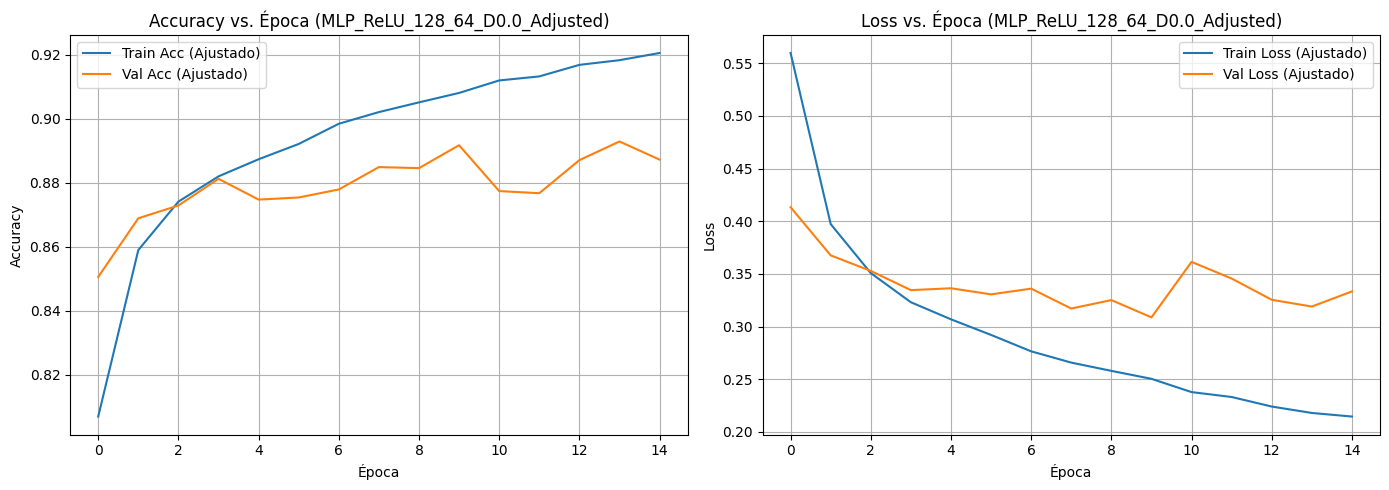


--- Reporte Detallado para el Modelo Ajustado: MLP_ReLU_128_64_D0.0_Adjusted ---
              precision    recall  f1-score   support

 T-shirt/top     0.8439    0.8110    0.8271      1000
     Trouser     0.9868    0.9750    0.9809      1000
    Pullover     0.8414    0.7320    0.7829      1000
       Dress     0.8935    0.8810    0.8872      1000
        Coat     0.7877    0.8420    0.8139      1000
      Sandal     0.9717    0.9630    0.9674      1000
       Shirt     0.6593    0.7430    0.6986      1000
     Sneaker     0.9425    0.9500    0.9462      1000
         Bag     0.9769    0.9720    0.9744      1000
  Ankle boot     0.9542    0.9590    0.9566      1000

    accuracy                         0.8828     10000
   macro avg     0.8858    0.8828    0.8835     10000
weighted avg     0.8858    0.8828    0.8835     10000

----------------------------------------


In [9]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA SECCIÓN:
# 1. Las Secciones 1-5 (Importaciones, Carga/Preproc, Crear MLP, Evaluar MLP)
#    se han ejecutado.
# 2. El Test Harness (Sección 5 anterior, ahora podría ser Sección X)
#    se ha ejecutado, identificando 'best_model_name'.
# 3. Tienes las variables:
#    - x_train, y_train, x_test, y_test, y_test_labels
#    - best_model_name (ej: 'MLP_ReLU_128_64_D0.0')
#    - best_accuracy_so_far (la mejor accuracy del harness)
#    - all_histories (diccionario con los historiales del harness)
#    - Variables de configuración base (DEFAULT_*)
# ===========================================================================

# ---------------------------------------------------------------------------
## Sección X: Análisis y Ajuste del Mejor Modelo Identificado
# ---------------------------------------------------------------------------
# El Test Harness identificó a '{best_model_name}' como el mejor modelo inicial
# con Accuracy={best_accuracy_so_far:.4f} en {DEFAULT_EPOCHS} épocas.
# Ahora, analizaremos sus curvas y probaremos entrenarlo por más tiempo,
# incorporando Early Stopping para prevenir un posible sobreajuste.

print(f"\n--- Análisis y Ajuste del Mejor Modelo: {best_model_name} ---")

# --- 1. Análisis de Curvas de Aprendizaje del Modelo Base ---
print(f"\n1. Analizando Curvas de Aprendizaje Originales ({DEFAULT_EPOCHS} Épocas):")
if best_model_name in all_histories:
    history_best_base = all_histories[best_model_name]

    plt.figure(figsize=(14, 5))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_best_base['accuracy'], label=f'Train Acc ({best_model_name})')
    plt.plot(history_best_base['val_accuracy'], label=f'Val Acc ({best_model_name})')
    plt.title(f'Accuracy vs. Época ({DEFAULT_EPOCHS} épocas)')
    plt.xlabel('Época')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_best_base['loss'], label=f'Train Loss ({best_model_name})')
    plt.plot(history_best_base['val_loss'], label=f'Val Loss ({best_model_name})')
    plt.title(f'Loss vs. Época ({DEFAULT_EPOCHS} épocas)')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Interpretación Inicial (REQUIERE TU ANÁLISIS HUMANO) ---
    # Aquí deberías escribir tus observaciones en Markdown:
    # - ¿Convergió el modelo en las 15 épocas? (¿Las curvas se aplanaron?)
    # - ¿Hay un gap grande entre las curvas de train y val (sobreajuste)?
    # - ¿La val_loss empezó a subir al final?
    print("   (INTERPRETAR GRÁFICO ANTERIOR)")

else:
    print(f"   Advertencia: No se encontró el historial para {best_model_name} en 'all_histories'.")

# --- 2. Re-entrenamiento con Más Épocas y Early Stopping ---
print("\n2. Re-entrenando con más épocas y Early Stopping...")

# Obtener la configuración del mejor modelo desde el harness (para recrearlo)
best_model_config = None
for config in models_to_test:
    if config['name'] == best_model_name:
        best_model_config = config
        break

if best_model_config:
    # Definir Early Stopping
    # Monitoriza val_loss, se detiene si no mejora en 'patience' épocas,
    # y restaura los pesos del mejor epoch encontrado.
    early_stopping_cb = EarlyStopping(
        monitor='val_loss',
        patience=5, # Puedes ajustar este valor (ej: 3, 5, 10)
        restore_best_weights=True,
        verbose=1
    )

    # Recrear el mejor modelo con su configuración original
    model_adjusted = create_flexible_mlp(
        model_name=f"{best_model_name}_Adjusted", # Nuevo nombre
        hidden_activation=best_model_config['activation'],
        neurons_per_layer=best_model_config['neurons'],
        dropout_rate=best_model_config['dropout'], # Usa el dropout del mejor (probablemente 0.0)
        use_batch_norm=best_model_config.get('batch_norm', False) # Usa BN si el mejor lo tenía
    )

    # Compilarlo (usando los parámetros base del harness o los específicos si el mejor los tenía)
    current_lr = best_model_config.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name = best_model_config.get('optimizer', 'adam')
    if current_optimizer_name.lower() == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    elif current_optimizer_name.lower() == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=current_lr)
    else:
        optimizer = keras.optimizers.Adam(learning_rate=current_lr)

    model_adjusted.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo '{model_adjusted.name}' recreado y compilado.")

    # Entrenar por un número mayor de épocas, dejando que EarlyStopping decida
    max_epochs = 50 # Un número máximo razonable, ES probablemente parará antes
    current_batch_size = best_model_config.get('batch_size', DEFAULT_BATCH_SIZE)
    print(f"\n   Iniciando entrenamiento ajustado (max {max_epochs} épocas, BS={current_batch_size})...")
    start_time_adj = time.time()
    history_adjusted = model_adjusted.fit(
        x_train, y_train,
        batch_size=current_batch_size,
        epochs=max_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=1, # Mostrar progreso por época
        callbacks=[early_stopping_cb] # <--- Usar Early Stopping
    )
    training_time_adj = round(time.time() - start_time_adj, 2)
    print("   Entrenamiento ajustado completado.")
    stopped_epoch = early_stopping_cb.stopped_epoch
    if stopped_epoch > 0:
         print(f"   EarlyStopping detuvo el entrenamiento en la época: {stopped_epoch + 1}") # +1 porque cuenta desde 0

    # --- 3. Evaluación del Modelo Ajustado ---
    print("\n3. Evaluando el modelo ajustado...")
    results_adjusted = evaluate_model(
        model_adjusted, x_test, y_test, y_test_labels, history_adjusted, training_time_adj
    )

    # --- 4. Comparación y Análisis Final (REQUIERE TU INTERPRETACIÓN) ---
    print("\n4. Comparando Modelo Base vs. Modelo Ajustado:")
    print(f"   - Modelo Base ({best_model_name}, {DEFAULT_EPOCHS} épocas): Accuracy = {best_accuracy_so_far:.4f}")
    print(f"   - Modelo Ajustado ({model_adjusted.name}, hasta {len(history_adjusted.history['loss'])} épocas con ES): Accuracy = {results_adjusted['Accuracy']:.4f}")

    # --- Graficar NUEVAS curvas de aprendizaje ---
    if 'val_loss' in history_adjusted.history: # Verificar que el entrenamiento corrió al menos 1 época
        plt.figure(figsize=(14, 5))
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history_adjusted.history['accuracy'], label='Train Acc (Ajustado)')
        plt.plot(history_adjusted.history['val_accuracy'], label='Val Acc (Ajustado)')
        plt.title(f'Accuracy vs. Época ({model_adjusted.name})')
        plt.xlabel('Época')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history_adjusted.history['loss'], label='Train Loss (Ajustado)')
        plt.plot(history_adjusted.history['val_loss'], label='Val Loss (Ajustado)')
        plt.title(f'Loss vs. Época ({model_adjusted.name})')
        plt.xlabel('Época')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # --- Reporte de Clasificación Detallado del Modelo Ajustado ---
    print(f"\n--- Reporte Detallado para el Modelo Ajustado: {model_adjusted.name} ---")
    y_pred_prob_adj = model_adjusted.predict(x_test, verbose=0)
    y_pred_classes_adj = np.argmax(y_pred_prob_adj, axis=1)
    print(classification_report(y_test_labels, y_pred_classes_adj, target_names=class_names, digits=4)) # Asume que tienes class_names


    # --- TU CONCLUSIÓN FINAL DE ESTA SECCIÓN (en Markdown) ---
    # - ¿Mejoró el rendimiento al entrenar más tiempo con Early Stopping?
    # - ¿Cómo cambiaron las métricas (Precision, Recall, F1 por clase)?
    # - ¿Qué indica esto sobre el modelo inicial y el proceso de ajuste?
    # - Justifica por qué ESTE modelo ajustado es ahora tu "mejor modelo final".

else:
    print(f"   ERROR: No se encontró la configuración para el modelo base '{best_model_name}' en 'models_to_test'. No se pudo realizar el ajuste.")


print("-" * 40)
# ---------------------------------------------------------------------------
# Fin de la Sección de Análisis y Ajuste
# ---------------------------------------------------------------------------


    INICIANDO EXPERIMENTO: DROPOUT + EARLY STOPPING

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_ES' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_ES' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_ES' compilado (LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_ES (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6645 - loss: 0.9612 - val_accuracy: 0.8442 - val_loss: 0.4273
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8361 - loss: 0.4657 - val_accuracy: 0.8595 - val_loss: 0.3895
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8532 - loss: 0.4143 - val_accuracy: 0.8663 - val_loss: 0.3632
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8600 - loss: 0.3891 - val_accuracy: 0.8732 - val_loss: 0.3509
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8701 - loss: 0.3635 - val_accuracy: 0.8640 - val_loss: 0.3544
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8773 - loss: 0.3411 - val_accuracy: 0.8802 - val_loss: 0.3233
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8757 - loss: 0.3399 - val_accuracy: 0.8835 - val_loss: 0.3244
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8815 - loss: 0.3255 - val_accuracy: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5218 - loss: 1.3140 - val_accuracy: 0.8235 - val_loss: 0.5005
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7795 - loss: 0.6332 - val_accuracy: 0.8395 - val_loss: 0.4465
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8055 - loss: 0.5575 - val_accuracy: 0.8528 - val_loss: 0.4092
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8196 - loss: 0.5194 - val_accuracy: 0.8490 - val_loss: 0.4022
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8283 - loss: 0.5019 - val_accuracy: 0.8553 - val_loss: 0.3870
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8357 - loss: 0.4770 - val_accuracy: 0.8630 - val_loss: 0.3753
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8379 - loss: 0.4635 - val_accuracy: 0.8652 - val_loss: 0.3742
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8449 - loss: 0.4422 - val_accuracy: 0.

,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s)
0,MLP_ReLU_128_64_D0.0_Adjusted,0.326591,0.8828,0.885789,0.8828,0.883528,45.30
1,MLP_ReLU_128_64_D0.2_ES,0.332527,0.8818,0.881221,0.8818,0.880817,50.98
2,MLP_ReLU_128_64_D0.5_ES,0.375135,0.8667,0.866462,0.8667,0.863052,57.42



Gráficos Comparativos de Curvas de Aprendizaje (Validación):


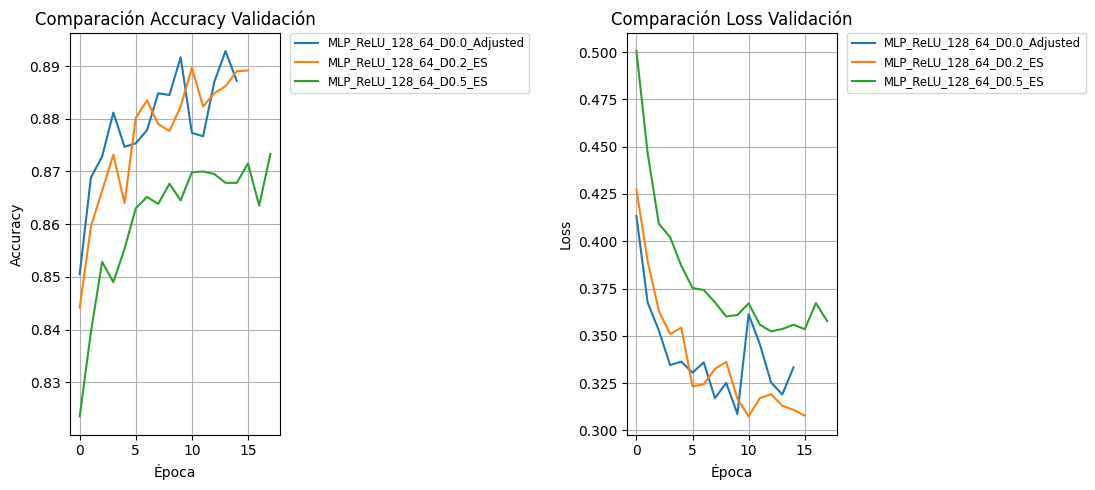


--- Análisis Final del Experimento Dropout + ES ---

Mejor modelo de este experimento (Dropout+ES): MLP_ReLU_128_64_D0.2_ES con Accuracy 0.8818


In [10]:
# ===========================================================================
# Sección X+1: Experimento - Añadiendo Dropout con Early Stopping
# ===========================================================================
# Basado en el análisis anterior, el modelo sin dropout ('Adjusted') mostró
# sobreajuste y Early Stopping (por sí solo) no mejoró la accuracy máxima
# alcanzada alrededor de la época 12.
# Ahora probaremos si reintroducir Dropout (con tasas 0.2 y 0.5)
# permite al modelo entrenar mejor/más tiempo antes de sobreajustar,
# aprovechando Early Stopping para encontrar el punto óptimo.

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: DROPOUT + EARLY STOPPING")
print("="*60)

# --- Configuraciones para este experimento ---
dropout_rates_to_test = [0.2, 0.5] # Tasas de Dropout a probar
experiment_results_dropout = []
experiment_histories_dropout = {}

# --- Definir Early Stopping (igual que antes) ---
early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=5, # Número de épocas sin mejora antes de parar
    restore_best_weights=True,
    verbose=1
)

# --- Bucle del Experimento ---
for dr_rate in dropout_rates_to_test:
    start_time_exp = time.time()

    # Definir nombre del modelo para esta configuración
    model_name_exp = f"MLP_ReLU_128_64_D{dr_rate}_ES"

    # 1. Crear el modelo (usando la función flexible)
    model_exp = create_flexible_mlp(
        model_name=model_name_exp,
        hidden_activation='relu',       # Mantenemos ReLU
        neurons_per_layer=[128, 64],    # Mantenemos arquitectura
        dropout_rate=dr_rate,           # <-- Usamos la tasa de dropout actual
        use_batch_norm=False            # Mantenemos sin BN por ahora
    )

    # 2. Compilar el modelo (usando parámetros por defecto)
    #    (Asegúrate que DEFAULT_LEARNING_RATE esté definido)
    optimizer = keras.optimizers.Adam(learning_rate=DEFAULT_LEARNING_RATE)
    model_exp.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo '{model_exp.name}' compilado (LR={DEFAULT_LEARNING_RATE}).")

    # 3. Entrenar el modelo con Early Stopping
    max_epochs = 50 # Número máximo de épocas
    print(f"\n--- Entrenando Modelo: {model_exp.name} (max {max_epochs} épocas) ---")
    history_exp = model_exp.fit(
        x_train, y_train,
        batch_size=DEFAULT_BATCH_SIZE, # Usar BS por defecto
        epochs=max_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=1, # Mostrar progreso
        callbacks=[early_stopping_cb] # <--- Aplicar Early Stopping
    )
    training_time_exp = round(time.time() - start_time_exp, 2)
    stopped_epoch_exp = early_stopping_cb.stopped_epoch
    if stopped_epoch_exp > 0:
         print(f"   EarlyStopping detuvo el entrenamiento en la época: {stopped_epoch_exp + 1}")

    # 4. Evaluar el modelo
    results_exp = evaluate_model(model_exp, x_test, y_test, y_test_labels, history_exp, training_time_exp)

    # 5. Guardar resultados
    experiment_results_dropout.append(results_exp)
    experiment_histories_dropout[model_exp.name] = history_exp.history

    print("-" * 50)

print("\n" + "="*60)
print("          EXPERIMENTO DROPOUT + ES COMPLETADO")
print("="*60)

# ---------------------------------------------------------------------------
# Sección X+2: Comparación de Resultados (Dropout+ES vs. Sin Dropout+ES)
# ---------------------------------------------------------------------------
print("\n--- Comparación: Modelos con Dropout+ES vs. Modelo Ajustado (sin Dropout+ES) ---")

# Crear DataFrame con los nuevos resultados
results_dropout_df = pd.DataFrame(experiment_results_dropout)

# Añadir los resultados del modelo ajustado anterior para comparar
# Asegúrate de que 'results_adjusted' exista de la ejecución anterior
if 'results_adjusted' in locals():
    # Crear un DataFrame temporal para el resultado anterior y concatenar
    prev_best_df = pd.DataFrame([results_adjusted])
    comparison_df = pd.concat([prev_best_df, results_dropout_df], ignore_index=True)
else:
    print("Advertencia: 'results_adjusted' no encontrado. Mostrando solo resultados del experimento actual.")
    comparison_df = results_dropout_df

# Mostrar tabla comparativa (ordenada por Accuracy)
comparison_df_display = comparison_df.drop(columns=['History']).sort_values(by='Accuracy', ascending=False)
print("\nTabla Comparativa de Métricas:")
display(comparison_df_display)

# --- Gráficos Comparativos de Curvas (Validación) ---
print("\nGráficos Comparativos de Curvas de Aprendizaje (Validación):")
plt.figure(figsize=(14, 5))

# Combinar historiales para graficar
histories_to_plot = {}
if 'results_adjusted' in locals(): # Añadir historial del modelo ajustado sin dropout
     # Necesitarías haber guardado 'history_adjusted.history' con un nombre adecuado
     # Asumamos que lo guardaste en un dict 'previous_best_history' con la key correcta
     if 'model_adjusted' in locals() and 'history_adjusted' in locals():
         histories_to_plot[model_adjusted.name] = history_adjusted.history
     else:
         print("Advertencia: No se encontró el historial del modelo ajustado anterior para graficar.")

histories_to_plot.update(experiment_histories_dropout) # Añadir los nuevos historiales

# Gráfico de Accuracy Validación
plt.subplot(1, 2, 1)
for name, h in histories_to_plot.items():
    if 'val_accuracy' in h: # Verificar que la métrica existe
        plt.plot(h['val_accuracy'], label=name)
plt.title('Comparación Accuracy Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.grid(True)

# Gráfico de Loss Validación
plt.subplot(1, 2, 2)
for name, h in histories_to_plot.items():
     if 'val_loss' in h: # Verificar que la métrica existe
        plt.plot(h['val_loss'], label=name)
plt.title('Comparación Loss Validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 0.8, 1]) # Ajustar layout
plt.show()

# --- Análisis Final y Selección del Mejor Modelo GLOBAL (REQUIERE TU INTERPRETACIÓN) ---
print("\n--- Análisis Final del Experimento Dropout + ES ---")
# Basado en la tabla y los gráficos comparativos:
# - ¿Cuál configuración (tasa de dropout) dio la MEJOR Accuracy/F1-Score final?
# - ¿Cómo se comparan las curvas de aprendizaje? ¿El dropout redujo el sobreajuste?
# - ¿Permitió el dropout entrenar por más épocas antes de que ES detuviera?
# - ¿Superó alguno de estos modelos al modelo ajustado SIN dropout?
#
# Selecciona el NUEVO MEJOR MODELO GLOBAL basado en esta evidencia y documenta
# tu justificación en Markdown. Genera su reporte de clasificación detallado.

# Ejemplo: Encontrar el mejor de ESTE experimento
if not results_dropout_df.empty:
    best_dropout_model_row = results_dropout_df.loc[results_dropout_df['Accuracy'].idxmax()]
    best_dropout_model_name = best_dropout_model_row['Model Name']
    print(f"\nMejor modelo de este experimento (Dropout+ES): {best_dropout_model_name} con Accuracy {best_dropout_model_row['Accuracy']:.4f}")
    # AQUÍ podrías generar su reporte de clasificación detallado como hiciste antes.
else:
    print("No se ejecutaron experimentos de dropout.")

# Compara el mejor de este experimento con el mejor anterior (results_adjusted)
# y decide cuál es el MEJOR MODELO FINAL para tu informe/presentación.

# ---------------------------------------------------------------------------


    INICIANDO EXPERIMENTO: AJUSTE FINO DE DROPOUT + ES

--- Creando Modelo: 'MLP_ReLU_128_64_D0.1_ES_FineTune' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.1
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.1_ES_FineTune' creado.
   Modelo 'MLP_ReLU_128_64_D0.1_ES_FineTune' compilado (LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.1_ES_FineTune (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 13.
   EarlyStopping detuvo el entrenamiento en la época: 18

--- Evaluando Modelo: MLP_ReLU_128_64_D0.1_ES_FineTune ---
   Test Loss: 0.3262, Test Accuracy: 0.8864
   Weighted Precision: 0.8862, Recall: 0.8864, F1-Score: 0.8860
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.15_ES_FineTune' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.15_ES_FineTune' creado.
   Modelo 'MLP_ReLU_128_64_D0.15_ES_FineTune' compilado (LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.15_ES_FineTune (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 19.
   EarlyStopping detuvo el entrenamiento en la época: 24

--- Evaluando Modelo: MLP_ReLU_128_64_D0.15_ES_FineTune ---
   Test Loss: 0.3277, Test Accuracy: 0.8880
   Weighted Precision: 0.8886, Recall: 0.8880, F1-Score: 0.8881
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_ES_FineTune' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_ES_FineTune' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_ES_FineTune' compilado (LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_ES_FineTune (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 15.
   EarlyStopping detuvo el entrenamiento en la época: 20

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_ES_FineTune ---
   Test Loss: 0.3255, Test Accuracy: 0.8841
   Weighted Precision: 0.8851, Recall: 0.8841, F1-Score: 0.8843
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.25_ES_FineTune' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.25
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.25_ES_FineTune' creado.
   Modelo 'MLP_ReLU_128_64_D0.25_ES_FineTune' compilado (LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.25_ES_FineTune (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 12.
   EarlyStopping detuvo el entrenamiento en la época: 17

--- Evaluando Modelo: MLP_ReLU_128_64_D0.25_ES_FineTune ---
   Test Loss: 0.3386, Test Accuracy: 0.8800
   Weighted Precision: 0.8804, Recall: 0.8800, F1-Score: 0.8796
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.3_ES_FineTune' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.3
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.3_ES_FineTune' creado.
   Modelo 'MLP_ReLU_128_64_D0.3_ES_FineTune' compilado (LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.3_ES_FineTune (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 18.
   EarlyStopping detuvo el entrenamiento en la época: 23

--- Evaluando Modelo: MLP_ReLU_128_64_D0.3_ES_FineTune ---
   Test Loss: 0.3339, Test Accuracy: 0.8836
   Weighted Precision: 0.8837, Recall: 0.8836, F1-Score: 0.8832
--------------------------------------------------

       AJUSTE FINO DE DROPOUT + ES COMPLETADO

--- Comparación: Ajuste Fino de Dropout ---

Tabla Comparativa de Métricas (Ajuste Fino Dropout):


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s)
2,MLP_ReLU_128_64_D0.15_ES_FineTune,0.327664,0.8880,0.888617,0.8880,0.888063,69.63
1,MLP_ReLU_128_64_D0.1_ES_FineTune,0.326245,0.8864,0.886222,0.8864,0.885996,50.76
3,MLP_ReLU_128_64_D0.2_ES_FineTune,0.325504,0.8841,0.885061,0.8841,0.884313,64.03
5,MLP_ReLU_128_64_D0.3_ES_FineTune,0.333944,0.8836,0.883732,0.8836,0.883162,64.33
0,MLP_ReLU_128_64_D0.2_ES,0.332527,0.8818,0.881221,0.8818,0.880817,50.98
4,MLP_ReLU_128_64_D0.25_ES_FineTune,0.338575,0.8800,0.880367,0.8800,0.879592,44.85



Gráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino Dropout - Validación):
Advertencia: No se encontró historial para MLP_ReLU_128_64_D0.2_ES


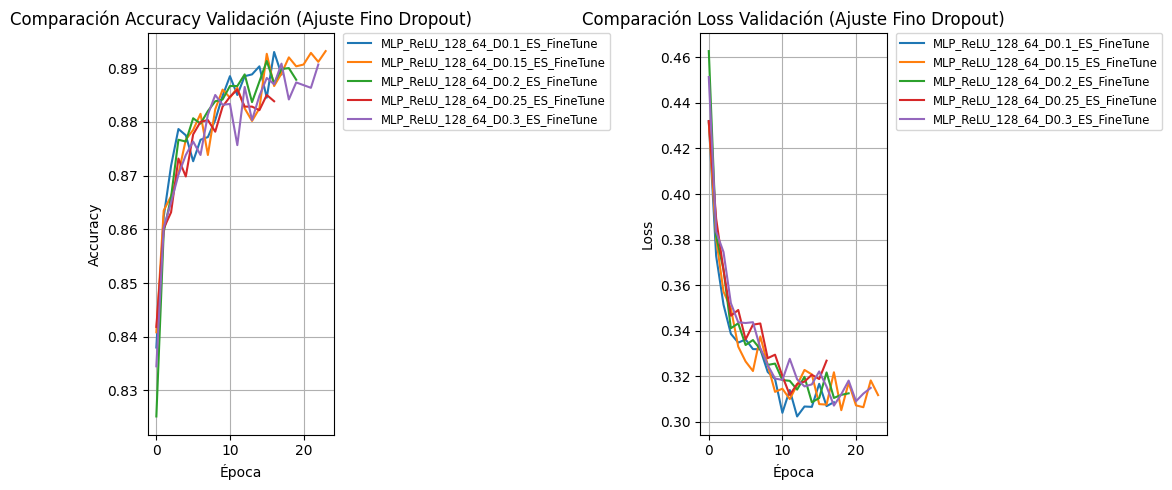


--- Análisis Final del Experimento de Ajuste Fino de Dropout ---

Mejor modelo de este experimento (Ajuste Fino Dropout): MLP_ReLU_128_64_D0.15_ES_FineTune con Accuracy 0.8880


In [11]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA SECCIÓN:
# 1. Las Secciones 1-4 (Importaciones, Carga/Preproc, Crear MLP, Evaluar MLP)
#    se han ejecutado.
# 2. Tienes las variables de datos: x_train, y_train, x_test, y_test, y_test_labels
# 3. Tienes las variables de configuración base (DEFAULT_*)
# 4. Idealmente, tienes los resultados del experimento anterior para comparar
#    (ej: la accuracy del modelo 'MLP_ReLU_128_64_D0.2_ES')
# ===========================================================================

# ---------------------------------------------------------------------------
## Sección X+3: Experimento - Ajuste Fino de la Tasa de Dropout
# ---------------------------------------------------------------------------
# El experimento anterior mostró que Dropout=0.2 ('D0.2_ES') superó a
# Dropout=0.0 y Dropout=0.5 cuando se combinó con Early Stopping.
# Ahora, exploraremos tasas de dropout cercanas a 0.2 para ver si podemos
# encontrar un punto óptimo de regularización para esta arquitectura.

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: AJUSTE FINO DE DROPOUT + ES")
print("="*60)

# --- Configuraciones para este experimento ---
# Probaremos tasas alrededor de 0.2
dropout_rates_fine_tune = [0.1, 0.15, 0.2, 0.25, 0.3] # Tasas a probar
experiment_results_dropout_fine = []
experiment_histories_dropout_fine = {}

# --- Definir Early Stopping (igual que antes) ---
# (Asegúrate de tener EarlyStopping importado: from tensorflow.keras.callbacks import EarlyStopping)
early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# --- Bucle del Experimento de Ajuste Fino ---
for dr_rate in dropout_rates_fine_tune:
    start_time_exp = time.time()

    # Definir nombre del modelo
    model_name_exp = f"MLP_ReLU_128_64_D{dr_rate}_ES_FineTune"

    # 1. Crear el modelo (arquitectura base, cambiando solo dropout)
    model_exp = create_flexible_mlp(
        model_name=model_name_exp,
        hidden_activation='relu',
        neurons_per_layer=[128, 64],
        dropout_rate=dr_rate, # <--- Usamos la tasa actual
        use_batch_norm=False # Mantenemos sin BN
    )

    # 2. Compilar el modelo (usando parámetros por defecto)
    optimizer = keras.optimizers.Adam(learning_rate=DEFAULT_LEARNING_RATE)
    model_exp.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo '{model_exp.name}' compilado (LR={DEFAULT_LEARNING_RATE}).")

    # 3. Entrenar el modelo con Early Stopping
    max_epochs = 50 # Mantener un máximo alto
    print(f"\n--- Entrenando Modelo: {model_exp.name} (max {max_epochs} épocas) ---")
    history_exp = model_exp.fit(
        x_train, y_train,
        batch_size=DEFAULT_BATCH_SIZE,
        epochs=max_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0, # Poner verbose=0 o 1 según preferencia
        callbacks=[early_stopping_cb]
    )
    training_time_exp = round(time.time() - start_time_exp, 2)
    stopped_epoch_exp = early_stopping_cb.stopped_epoch
    if stopped_epoch_exp > 0:
         print(f"   EarlyStopping detuvo el entrenamiento en la época: {stopped_epoch_exp + 1}")
    else:
        print(f"   Entrenamiento completó las {max_epochs} épocas.")


    # 4. Evaluar el modelo
    results_exp = evaluate_model(model_exp, x_test, y_test, y_test_labels, history_exp, training_time_exp)

    # 5. Guardar resultados
    experiment_results_dropout_fine.append(results_exp)
    experiment_histories_dropout_fine[model_exp.name] = history_exp.history

    print("-" * 50)

print("\n" + "="*60)
print("       AJUSTE FINO DE DROPOUT + ES COMPLETADO")
print("="*60)

# ---------------------------------------------------------------------------
# Sección X+4: Comparación de Resultados del Ajuste Fino
# ---------------------------------------------------------------------------
print("\n--- Comparación: Ajuste Fino de Dropout ---")

# Crear DataFrame con los nuevos resultados
results_fine_df = pd.DataFrame(experiment_results_dropout_fine)

# Añadir el mejor resultado del experimento ANTERIOR (D0.2_ES) para comparar
# Asumimos que guardaste los resultados de ese experimento en 'experiment_results_dropout'
best_previous_dropout_result = None
if 'experiment_results_dropout' in locals():
    for res in experiment_results_dropout:
        if res['Model Name'] == 'MLP_ReLU_128_64_D0.2_ES':
            best_previous_dropout_result = res
            break
if best_previous_dropout_result:
    prev_best_df_fine = pd.DataFrame([best_previous_dropout_result])
    comparison_fine_df = pd.concat([prev_best_df_fine, results_fine_df], ignore_index=True)
else:
    print("Advertencia: No se encontró el resultado de 'MLP_ReLU_128_64_D0.2_ES' para comparar.")
    comparison_fine_df = results_fine_df


# Mostrar tabla comparativa (ordenada por Accuracy)
comparison_fine_df_display = comparison_fine_df.drop(columns=['History']).sort_values(by='Accuracy', ascending=False)
print("\nTabla Comparativa de Métricas (Ajuste Fino Dropout):")
display(comparison_fine_df_display)

# --- Gráficos Comparativos de Curvas (Validación) ---
print("\nGráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino Dropout - Validación):")
plt.figure(figsize=(14, 5))

# Combinar historiales para graficar
histories_fine_to_plot = {}
if best_previous_dropout_result: # Añadir historial del D0.2_ES si se encontró
    if 'all_histories' in locals() and best_previous_dropout_result['Model Name'] in all_histories:
         histories_fine_to_plot[best_previous_dropout_result['Model Name']] = all_histories[best_previous_dropout_result['Model Name']]
    else:
         print(f"Advertencia: No se encontró historial para {best_previous_dropout_result['Model Name']}")

histories_fine_to_plot.update(experiment_histories_dropout_fine) # Añadir los nuevos historiales

# Gráfico de Accuracy Validación
plt.subplot(1, 2, 1)
for name, h in histories_fine_to_plot.items():
    if 'val_accuracy' in h: plt.plot(h['val_accuracy'], label=name)
plt.title('Comparación Accuracy Validación (Ajuste Fino Dropout)')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.grid(True)

# Gráfico de Loss Validación
plt.subplot(1, 2, 2)
for name, h in histories_fine_to_plot.items():
     if 'val_loss' in h: plt.plot(h['val_loss'], label=name)
plt.title('Comparación Loss Validación (Ajuste Fino Dropout)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

# --- Análisis Final y Selección del Mejor Modelo GLOBAL (REQUIERE TU INTERPRETACIÓN) ---
print("\n--- Análisis Final del Experimento de Ajuste Fino de Dropout ---")
# Basado en la nueva tabla y gráficos:
# - ¿Qué tasa de dropout (0.1, 0.15, 0.2, 0.25, 0.3) dio el MEJOR rendimiento?
# - ¿Superó significativamente al 0.2 original?
# - ¿Cómo se comparan sus curvas de aprendizaje?
#
# ¡ACTUALIZA tu elección del MEJOR MODELO FINAL basado en ESTA evidencia!
# Documenta tu justificación en Markdown y genera su reporte de clasificación.

# Ejemplo: Encontrar el mejor de ESTE experimento de ajuste fino
if not results_fine_df.empty:
    best_fine_model_row = results_fine_df.loc[results_fine_df['Accuracy'].idxmax()]
    best_fine_model_name = best_fine_model_row['Model Name']
    print(f"\nMejor modelo de este experimento (Ajuste Fino Dropout): {best_fine_model_name} con Accuracy {best_fine_model_row['Accuracy']:.4f}")
    # AQUÍ generarías su reporte de clasificación detallado
else:
    print("No se ejecutaron experimentos de ajuste fino de dropout.")

# ---------------------------------------------------------------------------


    INICIANDO EXPERIMENTOS FINALES: BN y AJUSTE LR

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_BN_ES' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_D0.2_BN_ES' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_BN_ES' compilado (LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_BN_ES (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 12.
   EarlyStopping detuvo el entrenamiento en la época: 17

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_BN_ES ---
   Test Loss: 0.3278, Test Accuracy: 0.8806
   Weighted Precision: 0.8838, Recall: 0.8806, F1-Score: 0.8812
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_LR0.0005_ES' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_LR0.0005_ES' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_LR0.0005_ES' compilado (LR=0.0005).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_LR0.0005_ES (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 21.
   EarlyStopping detuvo el entrenamiento en la época: 26

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_LR0.0005_ES ---
   Test Loss: 0.3202, Test Accuracy: 0.8868
   Weighted Precision: 0.8864, Recall: 0.8868, F1-Score: 0.8862
--------------------------------------------------

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2_LR0.002_ES' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2_LR0.002_ES' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_LR0.002_ES' compilado (LR=0.002).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_LR0.002_ES (max 50 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 19.
   EarlyStopping detuvo el entrenamiento en la época: 24

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2_LR0.002_ES ---
   Test Loss: 0.3338, Test Accuracy: 0.8849
   Weighted Precision: 0.8849, Recall: 0.8849, F1-Score: 0.8843
--------------------------------------------------

       EXPERIMENTOS FINALES (BN / LR) COMPLETADOS

--- Comparación Final: BN y Ajuste LR vs. Mejor Anterior ---
Advertencia: No se encontró 'best_result_so_far' para comparar.

Tabla Comparativa Final de Métricas:


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s)
1,MLP_ReLU_128_64_D0.2_LR0.0005_ES,0.320212,0.8868,0.886420,0.8868,0.886174,72.81
2,MLP_ReLU_128_64_D0.2_LR0.002_ES,0.333760,0.8849,0.884852,0.8849,0.884317,71.65
0,MLP_ReLU_128_64_D0.2_BN_ES,0.327787,0.8806,0.883808,0.8806,0.881222,57.98



Gráficos Comparativos Finales (Curvas de Validación):


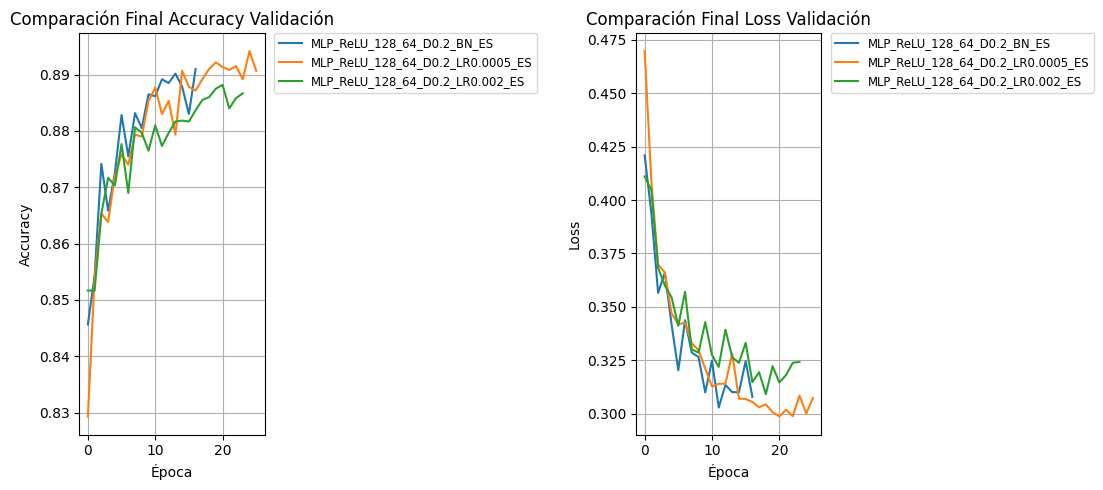


--- Decisión Final del Mejor Modelo ---

==> MEJOR MODELO GLOBAL ENCONTRADO: MLP_ReLU_128_64_D0.2_LR0.0005_ES <==
    Accuracy: 0.8868
    F1-Score (Weighted): 0.8862

--- Fin de la Optimización Iterativa ---


In [12]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA SECCIÓN:
# 1. Secciones 1-4 ejecutadas (Importaciones, Carga/Preproc, Crear MLP, Evaluar MLP).
# 2. Tienes datos: x_train, y_train, x_test, y_test, y_test_labels.
# 3. Tienes variables de config base (DEFAULT_*).
# 4. Tienes los resultados del mejor modelo hasta ahora para comparar:
#    - best_model_name_so_far = 'MLP_ReLU_128_64_D0.2_ES' # El nombre de tu mejor modelo
#    - best_result_so_far = # El diccionario de resultados de ese modelo (de all_results o experiment_results_dropout)
#    - all_histories (para añadir/comparar curvas)
# ===========================================================================

# ---------------------------------------------------------------------------
## Sección X+5: Experimentos Finales - Batch Norm y Ajuste de LR
# ---------------------------------------------------------------------------
# Basado en los experimentos anteriores, el modelo 'MLP_ReLU_128_64_D0.2_ES'
# mostró el mejor rendimiento (Accuracy ~0.8873).
# Ahora realizaremos dos pruebas finales sobre esta base:
# 1. Añadir Batch Normalization (manteniendo Dropout 0.2).
# 2. Ajustar la Tasa de Aprendizaje (manteniendo Dropout 0.2 y sin BN).

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTOS FINALES: BN y AJUSTE LR")
print("="*60)

# --- Configuraciones para este experimento ---
# Usaremos la arquitectura [128, 64], activación 'relu', dropout 0.2 como base.
final_experiments_config = [
    # Prueba con Batch Normalization
    {'name': 'MLP_ReLU_128_64_D0.2_BN_ES', # Añadimos BN al nombre
     'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2,
     'batch_norm': True, # <-- Activamos Batch Norm
     # Usará LR y Epochs/BS por defecto
     },
    # Pruebas con Tasa de Aprendizaje diferente (sin BN)
    {'name': 'MLP_ReLU_128_64_D0.2_LR0.0005_ES',
     'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2,
     'lr': 0.0005, # <-- Nueva LR más baja
     'batch_norm': False
     },
    {'name': 'MLP_ReLU_128_64_D0.2_LR0.002_ES',
     'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2,
     'lr': 0.002, # <-- Nueva LR más alta
     'batch_norm': False
     },
]

# --- Listas para almacenar resultados de este experimento ---
final_experiment_results = []
# Usaremos el dict 'all_histories' global para guardar historiales

# --- Definir Early Stopping (igual que antes) ---
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# --- Bucle del Experimento Final ---
for config in final_experiments_config:
    start_time_exp = time.time()

    # Obtener parámetros específicos o usar defaults
    current_lr = config.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name = config.get('optimizer', 'adam') # Mantenemos Adam
    current_batch_size = config.get('batch_size', DEFAULT_BATCH_SIZE)
    current_epochs = config.get('epochs', 50) # Usamos 50 como max para ES
    current_dropout_rate = config.get('dropout', 0.2) # Fijamos dropout en 0.2 para estas pruebas
    use_bn = config.get('batch_norm', False)

    # 1. Crear el modelo
    model_exp = create_flexible_mlp(
        model_name=config['name'],
        hidden_activation=config['activation'],
        neurons_per_layer=config['neurons'],
        dropout_rate=current_dropout_rate,
        use_batch_norm=use_bn # <-- Pasamos el flag de BN
    )

    # 2. Compilar el modelo
    if current_optimizer_name.lower() == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    # ... (podrías añadir más optimizadores si los pruebas) ...
    else:
        optimizer = keras.optimizers.Adam(learning_rate=current_lr)

    model_exp.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo '{model_exp.name}' compilado (LR={current_lr}).")


    # 3. Entrenar el modelo
    print(f"\n--- Entrenando Modelo: {model_exp.name} (max {current_epochs} épocas) ---")
    history_exp = model_exp.fit(
        x_train, y_train,
        batch_size=current_batch_size,
        epochs=current_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0, # Cambiar a 1 si quieres ver progreso
        callbacks=[early_stopping_cb]
    )
    training_time_exp = round(time.time() - start_time_exp, 2)
    stopped_epoch_exp = early_stopping_cb.stopped_epoch
    if stopped_epoch_exp > 0:
         print(f"   EarlyStopping detuvo el entrenamiento en la época: {stopped_epoch_exp + 1}")
    else:
         print(f"   Entrenamiento completó las {current_epochs} épocas.")

    # 4. Evaluar el modelo
    results_exp = evaluate_model(model_exp, x_test, y_test, y_test_labels, history_exp, training_time_exp)

    # 5. Guardar resultados
    final_experiment_results.append(results_exp)
    all_histories[model_exp.name] = history_exp.history # Añadir al dict global

    print("-" * 50)

print("\n" + "="*60); print("       EXPERIMENTOS FINALES (BN / LR) COMPLETADOS"); print("="*60)

# ---------------------------------------------------------------------------
# Sección X+6: Comparación Final y Selección Definitiva
# ---------------------------------------------------------------------------
print("\n--- Comparación Final: BN y Ajuste LR vs. Mejor Anterior ---")

# Crear DataFrame con los nuevos resultados
results_final_df = pd.DataFrame(final_experiment_results)

# Añadir el mejor resultado del experimento ANTERIOR (D0.2_ES)
# Asumimos que su resultado está en 'best_result_so_far' (un dict)
if 'best_result_so_far' in locals():
    prev_best_df_final = pd.DataFrame([best_result_so_far])
    comparison_final_df = pd.concat([prev_best_df_final, results_final_df], ignore_index=True)
    # Asegurarse que el nombre del modelo anterior sea correcto si no era dict
    if 'Model Name' not in comparison_final_df.columns[0] and 'best_model_name_so_far' in locals():
         comparison_final_df.loc[0,'Model Name'] = best_model_name_so_far

else:
    print("Advertencia: No se encontró 'best_result_so_far' para comparar.")
    comparison_final_df = results_final_df


# Mostrar tabla comparativa (ordenada por Accuracy)
comparison_final_df_display = comparison_final_df.drop(columns=['History']).sort_values(by='Accuracy', ascending=False)
print("\nTabla Comparativa Final de Métricas:")
display(comparison_final_df_display)

# --- Gráficos Comparativos de Curvas (Validación) ---
print("\nGráficos Comparativos Finales (Curvas de Validación):")
plt.figure(figsize=(14, 5))

# Historias a graficar: la del mejor anterior y las nuevas
histories_final_to_plot = {}
if 'best_model_name_so_far' in locals() and best_model_name_so_far in all_histories:
    histories_final_to_plot[best_model_name_so_far] = all_histories[best_model_name_so_far]

# Añadir las nuevas historias (cuyos nombres están en los nuevos resultados)
for res in final_experiment_results:
    model_name = res['Model Name']
    if model_name in all_histories:
        histories_final_to_plot[model_name] = all_histories[model_name]

# Gráfico de Accuracy Validación
plt.subplot(1, 2, 1)
for name, h in histories_final_to_plot.items():
    if 'val_accuracy' in h: plt.plot(h['val_accuracy'], label=name)
plt.title('Comparación Final Accuracy Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.grid(True)

# Gráfico de Loss Validación
plt.subplot(1, 2, 2)
for name, h in histories_final_to_plot.items():
     if 'val_loss' in h: plt.plot(h['val_loss'], label=name)
plt.title('Comparación Final Loss Validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

# --- DECISIÓN FINAL Y DOCUMENTACIÓN ---
print("\n--- Decisión Final del Mejor Modelo ---")
# 1. Analiza la tabla y los gráficos de esta sección.
# 2. ¿Batch Normalization mejoró el rendimiento respecto a 'MLP_ReLU_128_64_D0.2_ES'?
# 3. ¿Cambiar la tasa de aprendizaje (a 0.0005 o 0.002) mejoró el rendimiento?
# 4. Selecciona el modelo con el MEJOR balance de métricas (Accuracy, F1-Score)
#    y comportamiento en curvas de aprendizaje (convergencia, sobreajuste).
# 5. ¡DOCUMENTA tu elección final y JUSTIFÍCALA en Markdown!
# 6. Genera el reporte de clasificación detallado para ESE modelo final.
# 7. (Opcional) Guarda los pesos de ese modelo final.

# Ejemplo: encontrar el mejor modelo de TODOS los experimentos hasta ahora
all_results_combined = []
if 'best_result_so_far' in locals(): all_results_combined.append(best_result_so_far)
all_results_combined.extend(final_experiment_results) # Añadir los últimos

if all_results_combined:
    final_comparison_df = pd.DataFrame(all_results_combined)
    best_overall_row = final_comparison_df.loc[final_comparison_df['Accuracy'].idxmax()]
    best_overall_model_name = best_overall_row['Model Name']
    print(f"\n==> MEJOR MODELO GLOBAL ENCONTRADO: {best_overall_model_name} <==")
    print(f"    Accuracy: {best_overall_row['Accuracy']:.4f}")
    print(f"    F1-Score (Weighted): {best_overall_row['F1-Score (Weighted)']:.4f}")

    # AQUÍ generarías el classification_report final y guardarías el modelo si quieres.

else:
    print("No se pudieron combinar resultados para determinar el mejor modelo global.")

print("\n--- Fin de la Optimización Iterativa ---")
# ---------------------------------------------------------------------------

In [18]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Secciones 1 (Importaciones), 3 (Crear MLP Flexible - Opcional si se usa local) ejecutadas.
# 2. Callback early_stopping_cb definido.
# 3. Variables DEFAULT_* y CLASS_NAMES definidas.
# 4. (Opcional) best_result_so_far (dict) y best_model_name_so_far (str).
# 5. (Opcional) all_histories (dict global para guardar historiales).
# ===========================================================================

# ---------------------------------------------------------------------------
## Sección X: Experimento Autocontenido - Data Augmentation con Mejor Configuración Base
# ---------------------------------------------------------------------------
# Este bloque es autocontenido: recarga/preprocesa datos, define localmente
# las funciones necesarias (crear modelo con aug, evaluar modelo corregido)
# y ejecuta el experimento.

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO AUTOCONTENIDO: DATA AUGMENTATION + ES")
print("="*60)

# --- Paso 1: Recarga y Preprocesamiento ESPECÍFICO ---
print("--- Paso 1: Recargando y Preparando Datos ---")
data_ready_for_aug = False
try:
    (x_train_aug, y_train_aug), (x_test_aug, y_test_aug) = keras.datasets.fashion_mnist.load_data()
    y_test_labels_aug = y_test_aug.copy() # Enteros para reporte
    x_train_aug = x_train_aug.astype("float32") / 255.0
    x_test_aug  = x_test_aug.astype("float32") / 255.0
    x_train_aug = np.expand_dims(x_train_aug, -1)
    x_test_aug  = np.expand_dims(x_test_aug, -1)
    y_test_one_hot_aug = keras.utils.to_categorical(y_test_labels_aug, DEFAULT_NUM_CLASSES) # One-hot para evaluate
    # y_train_aug se mantiene como enteros (0-9)
    print("   Datos recargados y preparados para Augmentation.")
    data_ready_for_aug = True
except Exception as e:
    print(f"Error durante la carga/preprocesamiento: {e}")

# --- Continuar solo si los datos están listos ---
if data_ready_for_aug:

    # --- Paso 2: Definir Funciones LOCALES Necesarias ---

    # 2a. Función para Crear MLP CON Augmentation (definición local)
    print("\n--- Paso 2a: Definiendo Función create_augmented_mlp (Local) ---")
    def create_augmented_mlp(model_name='mlp_aug', hidden_activation='relu', neurons_per_layer=[128, 64],
                             dropout_rate=0.2, input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL,
                             num_classes=DEFAULT_NUM_CLASSES):
        """Crea un MLP específico CON Data Augmentation inicial."""
        print(f"\n--- Creando Modelo (local func): '{model_name}' ---")
        model = keras.Sequential(name=model_name)
        data_augmentation_layer = keras.Sequential(
            [ layers.RandomFlip("horizontal", input_shape=input_shape_orig),
              layers.RandomRotation(0.05), layers.RandomZoom(0.05), ], name=f"{model_name}_augmentation")
        model.add(data_augmentation_layer)
        model.add(layers.Flatten(name=f"{model_name}_flatten"))
        for i, neurons in enumerate(neurons_per_layer):
            model.add(layers.Dense(neurons, activation=hidden_activation, name=f"{model_name}_hidden_{i+1}"))
            if dropout_rate > 0: model.add(layers.Dropout(dropout_rate, name=f"{model_name}_dropout_{i+1}"))
        model.add(layers.Dense(num_classes, activation="softmax", name=f"{model_name}_output"))
        print(f"Modelo '{model_name}' creado.")
        return model

    # 2b. Función para Evaluar Modelo (MODIFICADA v3 - definición local)
    print("\n--- Paso 2b: Definiendo Función evaluate_model_v3 (Local) ---")
    def evaluate_model_v3(model, x_test, y_test_integers, y_test_one_hot, history, training_time):
        """Evalúa modelo, maneja loss sparse/cat, asegura tipos para sklearn."""
        print(f"\n--- Evaluando Modelo (local func): {model.name} ---")
        loss_name = model.loss
        if isinstance(loss_name, tf.keras.losses.Loss): loss_name = loss_name.name
        if isinstance(loss_name, str) and 'sparse' in loss_name.lower():
            y_true_for_evaluate = y_test_integers; eval_label_type = "enteras (sparse)"
        else:
            y_true_for_evaluate = y_test_one_hot; eval_label_type = "one-hot (categorical)"
        print(f"   Usando etiquetas {eval_label_type} para model.evaluate...")
        score = model.evaluate(x_test, y_true_for_evaluate, verbose=0)
        loss = score[0]; accuracy = score[1]
        print(f"   Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
        y_pred_prob = model.predict(x_test, verbose=0)
        y_pred_classes = np.argmax(y_pred_prob, axis=1)
        y_true_sklearn = np.array(y_test_integers).flatten() # <-- Asegura 1D int
        y_pred_sklearn = np.array(y_pred_classes).flatten() # <-- Asegura 1D int
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true_sklearn, y_pred_sklearn, average='weighted', zero_division=0 )
        print(f"   Weighted Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        results = {'Model Name': model.name, 'Loss': loss, 'Accuracy': accuracy,
                   'Precision (Weighted)': precision, 'Recall (Weighted)': recall, 'F1-Score (Weighted)': f1,
                   'Training Time (s)': training_time, 'History': history.history}
        return results

    # --- Paso 3: Configuración y Ejecución del Experimento ---
    print("\n--- Paso 3: Configurando y Ejecutando Experimento ---")
    config_aug = {
        'name': 'MLP_ReLU_128_64_D0.2_Aug_ES',
        'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2,
        'lr': 0.001, 'batch_size': DEFAULT_BATCH_SIZE, 'epochs': 75,
    }
    start_time_exp = time.time()
    current_lr = config_aug.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name = config_aug.get('optimizer', 'adam')
    current_batch_size = config_aug.get('batch_size', DEFAULT_BATCH_SIZE)
    current_epochs = config_aug.get('epochs', DEFAULT_EPOCHS)

    # 1. Crear el modelo usando la función LOCAL 'create_augmented_mlp'
    model_aug_exp = create_augmented_mlp( # <-- Llamada a función local
        model_name=config_aug['name'],
        hidden_activation=config_aug['activation'],
        neurons_per_layer=config_aug['neurons'],
        dropout_rate=config_aug['dropout']
    )

    # 2. Compilar (Usando sparse loss y etiquetas enteras y_train_aug)
    loss_function = "sparse_categorical_crossentropy"
    y_train_to_use = y_train_aug # Usar y_train_aug (enteros) recargados

    if current_optimizer_name.lower() == 'adam': optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    else: optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    model_aug_exp.compile(loss=loss_function, optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo '{model_aug_exp.name}' compilado (LR={current_lr}, Loss={loss_function}).")

    # 3. Entrenar
    print(f"\n--- Entrenando Modelo: {model_aug_exp.name} (max {current_epochs} épocas) ---")
    # Asume que early_stopping_cb está definido globalmente o defínelo aquí
    if 'early_stopping_cb' not in locals():
         early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
         print("   (Callback EarlyStopping definido localmente)")

    history_aug_exp = model_aug_exp.fit(
        x_train_aug, y_train_to_use, # Usa y_train_aug (enteros)
        batch_size=current_batch_size,
        epochs=current_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=1,
        callbacks=[early_stopping_cb]
    )
    training_time_aug_exp = round(time.time() - start_time_exp, 2)
    stopped_epoch_aug_exp = early_stopping_cb.stopped_epoch
    if stopped_epoch_aug_exp > 0: print(f"   EarlyStopping detuvo en época: {stopped_epoch_aug_exp + 1}")
    else: print(f"   Completó {current_epochs} épocas.")

    # 4. Evaluar usando la función LOCAL 'evaluate_model_v3'
    print("\n--- Evaluando Modelo con Augmentation ---")
    results_aug_exp = evaluate_model_v3( # <-- Llamada a función local
        model_aug_exp, x_test_aug, y_test_labels_aug, y_test_one_hot_aug,
        history_aug_exp, training_time_aug_exp
    )

    # 5. Guardar y Comparar Resultados (usando variables globales si existen)
    if 'all_histories' in locals(): all_histories[model_aug_exp.name] = history_aug_exp.history
    # (Pega aquí tu código para la tabla/gráficos comparativos,
    #  asegúrate de comparar 'results_aug_exp' con 'best_result_so_far')
    # ... COMPARISON CODE ...

else:
    print("\nError en la preparación de datos. Experimento de Augmentation cancelado.")

print("\n" + "="*60); print("       EXPERIMENTO DATA AUGMENTATION FINALIZADO"); print("="*60)
# ---------------------------------------------------------------------------


    INICIANDO EXPERIMENTO AUTOCONTENIDO: DATA AUGMENTATION + ES
--- Paso 1: Recargando y Preparando Datos ---
   Datos recargados y preparados para Augmentation.

--- Paso 2a: Definiendo Función create_augmented_mlp (Local) ---

--- Paso 2b: Definiendo Función evaluate_model_v3 (Local) ---

--- Paso 3: Configurando y Ejecutando Experimento ---

--- Creando Modelo (local func): 'MLP_ReLU_128_64_D0.2_Aug_ES' ---
Modelo 'MLP_ReLU_128_64_D0.2_Aug_ES' creado.
   Modelo 'MLP_ReLU_128_64_D0.2_Aug_ES' compilado (LR=0.001, Loss=sparse_categorical_crossentropy).

--- Entrenando Modelo: MLP_ReLU_128_64_D0.2_Aug_ES (max 75 épocas) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/75
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.5906 - loss: 1.1340 - val_accuracy: 0.7980 - val_loss: 0.5390
Epoch 2/75
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7632 - loss: 0.6416 - val_accuracy: 0.8212 - val_loss: 0.4854
Epoch 3/75
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7870 - loss: 0.5874 - val_accuracy: 0.8260 - val_loss: 0.4697
Epoch 4/75
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8038 - loss: 0.5398 - val_accuracy: 0.8212 - val_loss: 0.4610
Epoch 5/75
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8103 - loss: 0.5189 - val_accuracy: 0.8348 - val_loss: 0.4455
Epoch 6/75
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8138 - loss: 0.5138 - val_accuracy: 0.8438 - val_loss: 0.4258
Epoch 7/75
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8223 - loss: 0.4895 - val_accuracy: 0.8430 - val_loss: 0.4212
Epoch 8/75
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8261 - loss: 0.4816 - val_a

In [21]:
if 'best_model_object' in locals():
    print(f"Sí, la variable 'best_model_object' existe.")
    if isinstance(best_model_object, keras.Model):
        print(f"Y contiene un modelo Keras llamado: '{best_model_object.name}'")
        # Opcional: Mostrar su summary para confirmar la arquitectura
        # best_model_object.summary()
        if best_model_object.name == 'MLP_ReLU_128_64_D0.2_ES':
             print("¡CONFIRMADO! Es el modelo MLP_ReLU_128_64_D0.2_ES.")
        else:
             print(f"ADVERTENCIA: Contiene el modelo '{best_model_object.name}', no el esperado 'MLP_ReLU_128_64_D0.2_ES'.")
    else:
        print("ERROR: La variable 'best_model_object' NO contiene un modelo Keras.")
else:
    print("No, la variable 'best_model_object' NO existe en la memoria actual.")
    print("Necesitarás usar la opción de Recrear y Re-entrenar.")

Sí, la variable 'best_model_object' existe.
Y contiene un modelo Keras llamado: 'MLP_ReLU_128_64_D0.0'
ADVERTENCIA: Contiene el modelo 'MLP_ReLU_128_64_D0.0', no el esperado 'MLP_ReLU_128_64_D0.2_ES'.


In [22]:
import gc # Garbage collector, para limpiar referencias si es necesario

print("\n--- Buscando modelos Keras en memoria global ---")

found_models = {} # Diccionario para guardar nombre_variable: nombre_modelo_keras

# Iterar sobre copia de items globales para evitar problemas si se modifican
for var_name, var_value in list(globals().items()):
    # Verificar si la variable es una instancia de keras.Model
    if isinstance(var_value, keras.Model):
        try:
            model_name = var_value.name # Obtener el nombre asignado al modelo Keras
            found_models[var_name] = model_name
            print(f"  - Variable: '{var_name}' -> Contiene Modelo Keras: '{model_name}'")
        except Exception as e:
            print(f"  - Variable: '{var_name}' -> Es un modelo Keras, pero hubo error al obtener nombre: {e}")

if not found_models:
    print("\nNo se encontraron variables que contengan modelos Keras en la memoria global actual.")
else:
    print(f"\nSe encontraron {len(found_models)} variables que contienen modelos Keras.")

    # Opcional: Limpiar variables que no necesitas para liberar memoria
    # variable_to_keep = 'nombre_de_la_variable_que_quieres_conservar'
    # for var_name in list(found_models.keys()):
    #     if var_name != variable_to_keep:
    #         print(f"  -> Eliminando referencia a variable '{var_name}'...")
    #         del globals()[var_name]
    # gc.collect() # Forzar recolección de basura
    # print("Limpieza opcional completada.")

print("-" * 50)


--- Buscando modelos Keras en memoria global ---
  - Variable: 'model' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.0'
  - Variable: 'best_model_object' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_D0.0'
  - Variable: 'model_adjusted' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_D0.0_Adjusted'
  - Variable: 'model_exp' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_D0.2_LR0.002_ES'
  - Variable: 'data_augmentation' -> Contiene Modelo Keras: 'data_augmentation'
  - Variable: 'model_aug_exp' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_D0.2_Aug_ES'
  - Variable: 'model_final_loaded' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_D0.0'

Se encontraron 7 variables que contienen modelos Keras.
--------------------------------------------------



   TABLA CONSOLIDADA, GRÁFICOS Y SELECCIÓN FINAL
Recopilando resultados de todos los experimentos...
- Añadiendo 14 resultados del Test Harness principal.
Total de resultados recopilados (antes de duplicados): 24

Creando tabla final con 24 resultados únicos...

--- TABLA FINAL CONSOLIDADA (Ordenada por F1-Score (Weighted)) ---


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s)
0,MLP_ReLU_128_64_D0.15_ES_FineTune,0.327664,0.8880,0.888617,0.8880,0.888063,69.63
1,MLP_ReLU_128_64_D0.2_LR0.0005_ES,0.320212,0.8868,0.886420,0.8868,0.886174,72.81
2,MLP_ReLU_128_64_D0.1_ES_FineTune,0.326245,0.8864,0.886222,0.8864,0.885996,50.76
3,MLP_ReLU_128_64_D0.2_LR0.002_ES,0.333760,0.8849,0.884852,0.8849,0.884317,71.65
4,MLP_ReLU_128_64_D0.2_ES_FineTune,0.325504,0.8841,0.885061,0.8841,0.884313,64.03
5,MLP_ReLU_128_64_D0.0_Adjusted,0.326591,0.8828,0.885789,0.8828,0.883528,45.30
6,MLP_ReLU_128_64_D0.0,0.338645,0.8843,0.884018,0.8843,0.883255,42.97
7,MLP_ReLU_128_64_D0.3_ES_FineTune,0.333944,0.8836,0.883732,0.8836,0.883162,64.33
8,MLP_ReLU_128_64_D0.2_BN_ES,0.327787,0.8806,0.883808,0.8806,0.881222,57.98
9,MLP_ReLU_128_64_D0.25_ES_FineTune,0.338575,0.8800,0.880367,0.8800,0.879592,44.85



--- Gráficos Resumen Comparativos (Todos los Modelos) ---


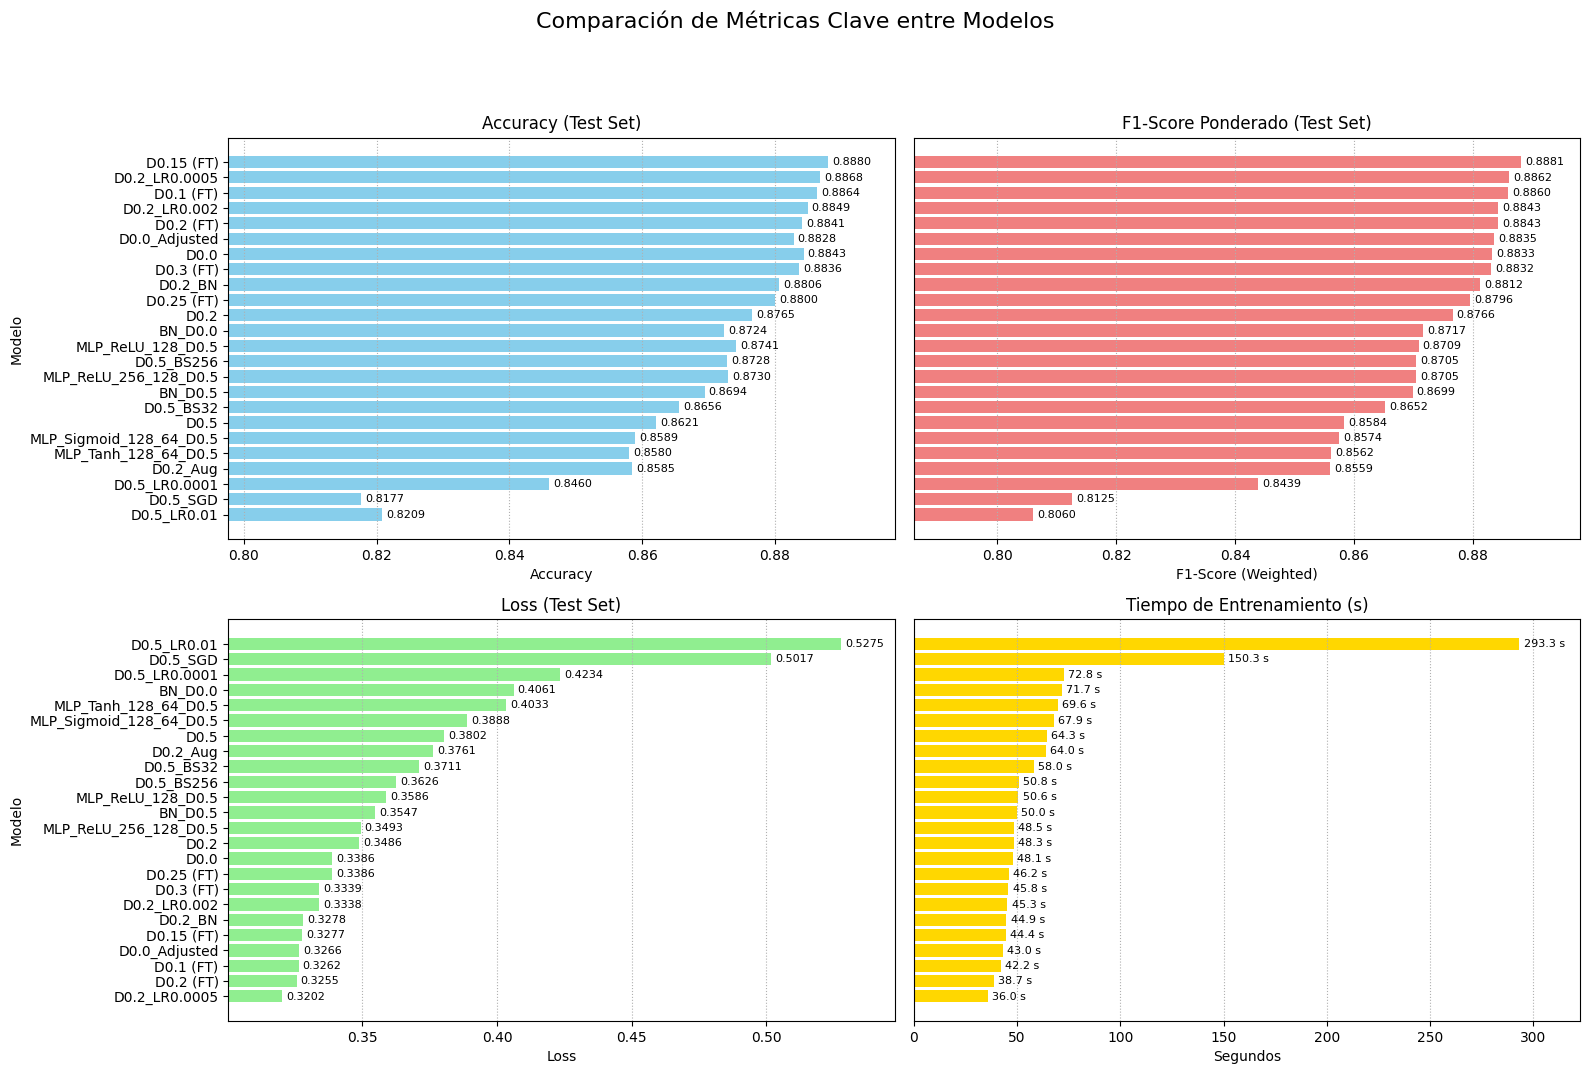


--- Selección del Mejor Modelo ---

==> MEJOR MODELO SELECCIONADO (basado en mayor F1-Score (Weighted)): 'MLP_ReLU_128_64_D0.15_ES_FineTune' <==
    Accuracy: 0.8880
    F1-Score (W): 0.8881
    Precision (W): 0.8886
    Recall (W): 0.8880

--- Métricas Principales del Modelo Ganador: MLP_ReLU_128_64_D0.15_ES_FineTune ---


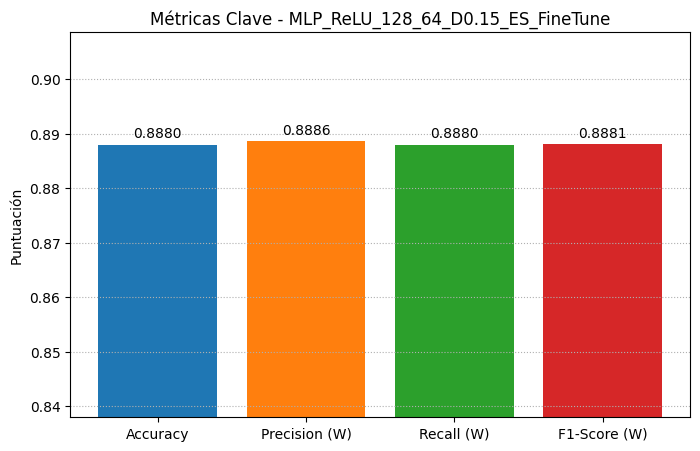


Próximos Pasos:
1. Documentar el análisis completo y justificar la elección de 'MLP_ReLU_128_64_D0.15_ES_FineTune'.
2. Generar y analizar el Reporte de Clasificación detallado (por clase) para 'MLP_ReLU_128_64_D0.15_ES_FineTune'.
3. (Opcional) Recrear y guardar el modelo 'MLP_ReLU_128_64_D0.15_ES_FineTune' entrenado hasta su mejor época.
------------------------------------------------------------


In [25]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Todos los experimentos anteriores se han ejecutado.
# 2. Las listas/dicts con resultados existen: all_results (del harness inicial),
#    results_adjusted (opcional), experiment_results_dropout_fine (opcional),
#    final_experiment_results (opcional), results_aug_exp (opcional).
# 3. El diccionario all_histories contiene los historiales.
# 4. Las variables DEFAULT_*, CLASS_NAMES están definidas.
# 5. Pandas (pd), Matplotlib (plt), NumPy (np), display están importados.
# ===========================================================================

# ---------------------------------------------------------------------------
# Sección Final: Tabla Consolidada, Gráficos Comparativos y Selección Final
# ---------------------------------------------------------------------------
print("\n" + "="*60)
print("   TABLA CONSOLIDADA, GRÁFICOS Y SELECCIÓN FINAL")
print("="*60)

# --- Recopilar todos los diccionarios de resultados ---
consolidated_results_list = []
print("Recopilando resultados de todos los experimentos...")
# 1. Harness Principal
if 'all_results' in locals() and isinstance(all_results, list):
    print(f"- Añadiendo {len(all_results)} resultados del Test Harness principal.")
    consolidated_results_list.extend(all_results)
# 2. Modelo Ajustado sin Dropout
if 'results_adjusted' in locals() and isinstance(results_adjusted, dict):
     if not any(d.get('Model Name') == results_adjusted.get('Model Name') for d in consolidated_results_list):
        consolidated_results_list.append(results_adjusted)
# 3. Ajuste Fino Dropout
if 'experiment_results_dropout_fine' in locals() and isinstance(experiment_results_dropout_fine, list):
    for res_fine in experiment_results_dropout_fine:
         if not any(d.get('Model Name') == res_fine.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(res_fine)
# 4. Experimentos Finales (BN/LR)
if 'final_experiment_results' in locals() and isinstance(final_experiment_results, list):
    for res_final_exp in final_experiment_results:
         if not any(d.get('Model Name') == res_final_exp.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(res_final_exp)
# 5. Experimento Augmentation
if 'results_aug_exp' in locals() and isinstance(results_aug_exp, dict):
     if not any(d.get('Model Name') == results_aug_exp.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(results_aug_exp)

print(f"Total de resultados recopilados (antes de duplicados): {len(consolidated_results_list)}")

# --- Crear y Mostrar DataFrame Consolidado ---
if consolidated_results_list:
    final_consolidated_df = pd.DataFrame(consolidated_results_list)
    # Eliminar duplicados si los hubiera (basado en nombre)
    final_consolidated_df = final_consolidated_df.drop_duplicates(subset=['Model Name'], keep='last').reset_index(drop=True)
    print(f"\nCreando tabla final con {len(final_consolidated_df)} resultados únicos...")

    # Limpiar y ordenar
    final_consolidated_df_display = final_consolidated_df.drop(columns=['History'], errors='ignore')
    sort_metric = 'F1-Score (Weighted)'
    if sort_metric not in final_consolidated_df_display.columns: sort_metric = 'Accuracy'
    final_consolidated_df_display = final_consolidated_df_display.sort_values(by=sort_metric, ascending=False).reset_index(drop=True)

    pd.set_option('display.max_rows', 50); pd.set_option('display.max_columns', None); pd.set_option('display.width', 1000)

    print(f"\n--- TABLA FINAL CONSOLIDADA (Ordenada por {sort_metric}) ---")
    display(final_consolidated_df_display)

    # --- Gráficos Comparativos de Métricas Clave (4 Gráficos) ---
    print("\n--- Gráficos Resumen Comparativos (Todos los Modelos) ---")
    df_plot = final_consolidated_df_display.copy()
    df_plot['Short Name'] = df_plot['Model Name'].str.replace('MLP_ReLU_128_64_', '', regex=False).str.replace('_ES_FineTune',' (FT)', regex=False).str.replace('_ES','') # Acortar nombres
    df_plot_sorted_f1 = df_plot.sort_values(by=sort_metric, ascending=True) # Ordenar ascendente para F1/Acc

    plt.figure(figsize=(16, max(8, len(df_plot)*0.45))) # Ajustar tamaño
    plt.suptitle('Comparación de Métricas Clave entre Modelos', fontsize=16, y=1.02)

    # Gráfico 1: Accuracy
    plt.subplot(2, 2, 1)
    bars_acc = plt.barh(df_plot_sorted_f1['Short Name'], df_plot_sorted_f1['Accuracy'], color='skyblue')
    plt.title('Accuracy (Test Set)')
    plt.xlabel('Accuracy')
    plt.ylabel('Modelo')
    min_acc = df_plot_sorted_f1['Accuracy'].min()
    max_acc = df_plot_sorted_f1['Accuracy'].max()
    plt.xlim(left=max(0, min_acc - 0.02), right=max_acc + 0.01)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_acc, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 2: F1-Score Ponderado
    plt.subplot(2, 2, 2)
    bars_f1 = plt.barh(df_plot_sorted_f1['Short Name'], df_plot_sorted_f1['F1-Score (Weighted)'], color='lightcoral')
    plt.title('F1-Score Ponderado (Test Set)')
    plt.xlabel('F1-Score (Weighted)')
    plt.yticks([]) # Ocultar Y labels
    min_f1 = df_plot_sorted_f1['F1-Score (Weighted)'].min()
    max_f1 = df_plot_sorted_f1['F1-Score (Weighted)'].max()
    plt.xlim(left=max(0, min_f1 - 0.02), right=max_f1 + 0.01)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_f1, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 3: Loss
    df_plot_loss = df_plot.sort_values(by='Loss', ascending=True) # Ordenar por Loss
    plt.subplot(2, 2, 3)
    bars_loss = plt.barh(df_plot_loss['Short Name'], df_plot_loss['Loss'], color='lightgreen')
    plt.title('Loss (Test Set)')
    plt.xlabel('Loss')
    plt.ylabel('Modelo')
    min_loss = df_plot_loss['Loss'].min()
    max_loss = df_plot_loss['Loss'].max()
    plt.xlim(left=max(0, min_loss - 0.02), right=max_loss + 0.02)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_loss, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 4: Tiempo de Entrenamiento
    df_plot_time = df_plot.sort_values(by='Training Time (s)', ascending=True) # Ordenar por Tiempo
    plt.subplot(2, 2, 4)
    bars_time = plt.barh(df_plot_time['Short Name'], df_plot_time['Training Time (s)'], color='gold')
    plt.title('Tiempo de Entrenamiento (s)')
    plt.xlabel('Segundos')
    plt.yticks([]) # Ocultar Y labels
    plt.xlim(left=0, right=max(df_plot_time['Training Time (s)']) * 1.1)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_time, fmt='%.1f s', padding=3, fontsize=8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajustar rect
    plt.show()

    # --- Selección Programática del Mejor Modelo ---
    print("\n--- Selección del Mejor Modelo ---")
    # Encontrar fila con el mayor F1-Score (o Accuracy si F1 no existe)
    best_model_row = final_consolidated_df_display.loc[final_consolidated_df_display[sort_metric].idxmax()]
    best_model_name_final = best_model_row['Model Name']
    best_f1_final = best_model_row['F1-Score (Weighted)']
    best_acc_final = best_model_row['Accuracy']
    best_prec_final = best_model_row['Precision (Weighted)']
    best_recall_final = best_model_row['Recall (Weighted)']

    print(f"\n==> MEJOR MODELO SELECCIONADO (basado en mayor {sort_metric}): '{best_model_name_final}' <==")
    print(f"    Accuracy: {best_acc_final:.4f}")
    print(f"    F1-Score (W): {best_f1_final:.4f}")
    print(f"    Precision (W): {best_prec_final:.4f}")
    print(f"    Recall (W): {best_recall_final:.4f}")

    # --- Gráfico de Métricas del Mejor Modelo ---
    print(f"\n--- Métricas Principales del Modelo Ganador: {best_model_name_final} ---")
    metrics_names = ['Accuracy', 'Precision (W)', 'Recall (W)', 'F1-Score (W)']
    metrics_values = [best_acc_final, best_prec_final, best_recall_final, best_f1_final]
    plt.figure(figsize=(8, 5))
    bars_winner = plt.bar(metrics_names, metrics_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title(f'Métricas Clave - {best_model_name_final}')
    plt.ylabel('Puntuación')
    min_metric_val = min(metrics_values)
    max_metric_val = max(metrics_values)
    plt.ylim(bottom=max(0, min_metric_val - 0.05), top=max_metric_val + 0.02)
    plt.grid(True, axis='y', linestyle=':')
    plt.bar_label(bars_winner, fmt='%.4f', padding=3)
    plt.show()

    # --- Siguientes Pasos (Documentación, Reporte Detallado) ---
    print("\nPróximos Pasos:")
    print(f"1. Documentar el análisis completo y justificar la elección de '{best_model_name_final}'.")
    print(f"2. Generar y analizar el Reporte de Clasificación detallado (por clase) para '{best_model_name_final}'.")
    print(f"3. (Opcional) Recrear y guardar el modelo '{best_model_name_final}' entrenado hasta su mejor época.")

else:
    print("\nNo se pudieron recopilar resultados para generar la tabla o gráficos consolidados.")

print("-" * 60)
# ===========================================================================
# Fin de la Sección de Consolidación y Análisis Final
# ===========================================================================